# Installing Model Visualizer

In [1]:
!python -m pip install visualkeras

  Obtaining dependency information for visualkeras from https://files.pythonhosted.org/packages/33/b4/ec8c338e215253894da56dc8bb435abfb8a5adacf857391b936a76550fb6/visualkeras-0.1.2-py3-none-any.whl.metadata
  Obtaining dependency information for aggdraw>=1.3.11 from https://files.pythonhosted.org/packages/8a/21/6519c5c627ca361e889ab928c8ed4fc66dd308314ef3d3ba8bf0400c0b01/aggdraw-1.3.18.post0-cp311-cp311-win_amd64.whl.metadata
   ---------------------------------------- 0.0/45.0 kB ? eta -:--:--
   ---------------------------------------- 45.0/45.0 kB 2.2 MB/s eta 0:00:00


# Fetch Necessary Libraries

In [28]:
import plotly.offline as pyo
from tqdm import tqdm
pyo.init_notebook_mode()
import numpy as np
from numpy import expand_dims
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import os
import cv2 
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.express as px
import plotly.io as pio
import statsmodels.api as sm
from sklearn import preprocessing
import random
import tensorflow as tf

from keras.models import Model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

import warnings
warnings.filterwarnings("ignore")

In [29]:
pip install –upgrade matplotlib

Note: you may need to restart the kernel to use updated packages.


ERROR: Invalid requirement: '–upgrade'


# **Loading data from file**

In [37]:
def Create_Directory_DataFrame():
    df = pd.DataFrame(columns=['Class', 'Location'])
    basedir = './leapGestRecog/'
    
    for folder in os.listdir(basedir):
        for Class in os.listdir(os.path.join(basedir, folder)):
            for location in os.listdir(os.path.join(basedir, folder, Class)):
                df = pd.concat([df, pd.DataFrame({'Class': [Class], 'Location': [os.path.join(basedir, folder, Class, location)]})], ignore_index=True)
    
    df = df.sample(frac=1).reset_index(drop=True)
    return df


In [38]:
df = Create_Directory_DataFrame()
print(df.shape)
df.head()

(20000, 2)


Class                                           Location
0        10_down    ./leapGestRecog/02\10_down\frame_02_10_0003.png
1  04_fist_moved  ./leapGestRecog/00\04_fist_moved\frame_00_04_0...
2  04_fist_moved  ./leapGestRecog/05\04_fist_moved\frame_05_04_0...
3          07_ok      ./leapGestRecog/06\07_ok\frame_06_07_0032.png
4       05_thumb   ./leapGestRecog/01\05_thumb\frame_01_05_0016.png

# **Data Visualization** 

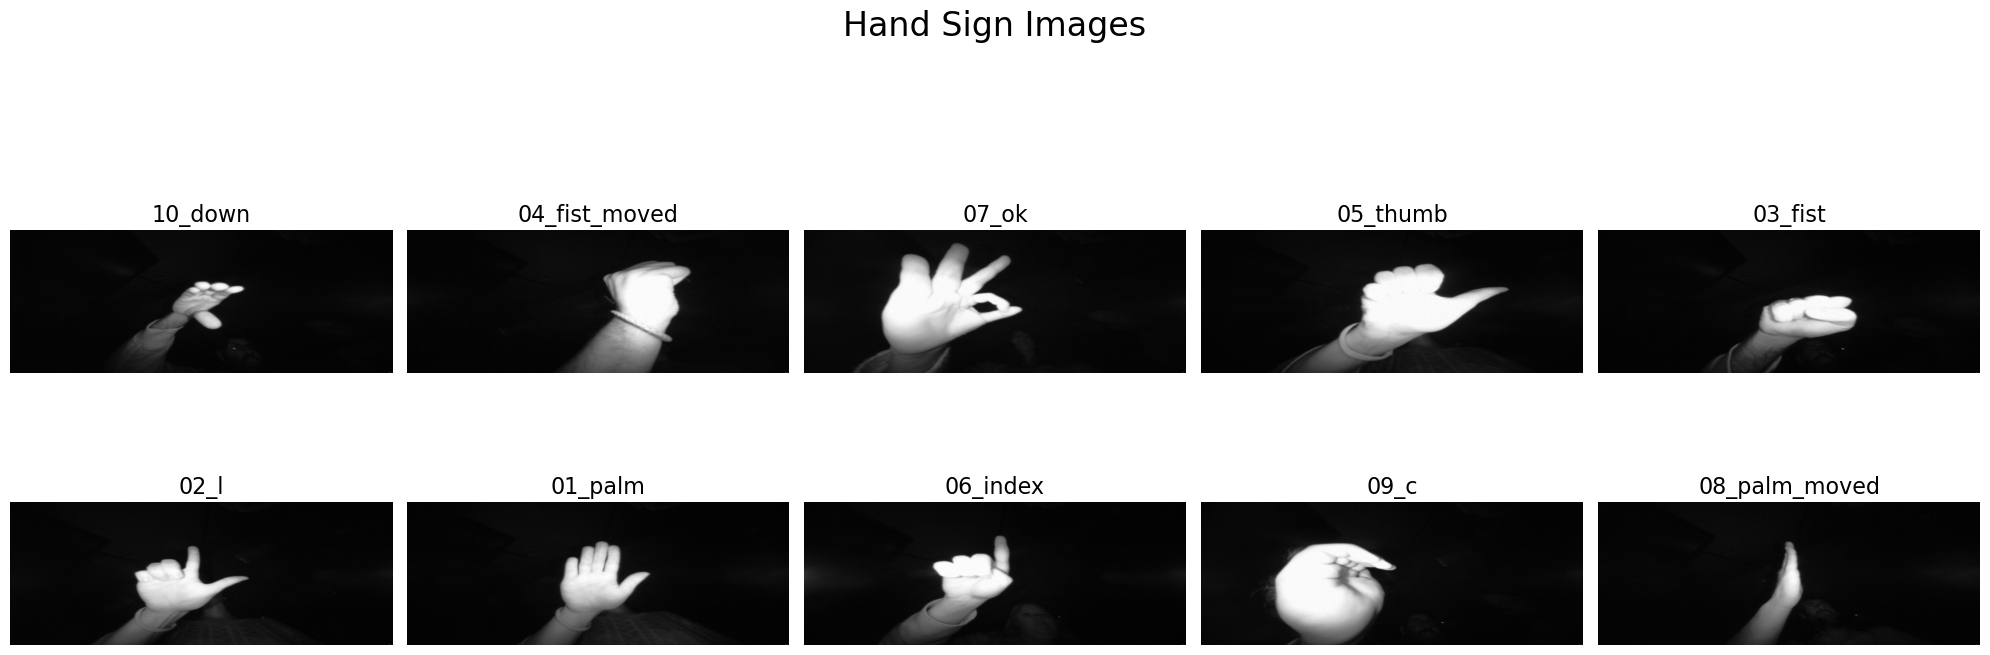

In [39]:
unique_classes = df['Class'].unique()
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(20, 8))
fig.suptitle("Hand Sign Images", size=24)

axes = axes.flatten()

for i, current_class in enumerate(unique_classes):
    subset = df[df['Class'] == current_class]
    sample_row = subset.sample().iloc[0]
    image_path = sample_row['Location']

    img = cv2.imread(image_path, 0)
    axes[i].imshow(img, cmap='gray')
    axes[i].set_title(current_class, fontsize=16)
    axes[i].axis('off')  # Turn off axis labels
plt.tight_layout(rect=[0, 0, 1, 0.95])

plt.show()


In [40]:
img.shape

(240, 640)

# **Define Constraints for the images**

In [41]:
w , h= 64,64
final_class = 10

# **Data Creation**

In [42]:
# Read and preprocess images
train_image = [cv2.resize(cv2.imread(location, 0), (w, h), interpolation=cv2.INTER_AREA).reshape(w, h, 1) / 255.0
               for location in tqdm(df['Location'])]

# Convert the list to a NumPy array
X = np.array(train_image)

100%|████████████████████████████████████████████████████████████████████████████| 20000/20000 [15:17<00:00, 21.79it/s]


In [43]:
y = df['Class'].values.reshape(-1, 1)
enc = OneHotEncoder(handle_unknown='ignore')
enc.fit(y)

print(enc.categories_)


[array(['01_palm', '02_l', '03_fist', '04_fist_moved', '05_thumb',
       '06_index', '07_ok', '08_palm_moved', '09_c', '10_down'],
      dtype=object)]


In [44]:
y = enc.transform(y).toarray()

In [45]:
print('Data   :   '+str(X.shape))
print('Output :   '+str(y.shape))

Data   :   (20000, 64, 64, 1)
Output :   (20000, 10)


# **Samples**

In [46]:
print(X[0].reshape(w,h))

[[0.01568627 0.01568627 0.01568627 ... 0.01568627 0.01176471 0.01568627]
 [0.01960784 0.01568627 0.01960784 ... 0.01568627 0.01176471 0.01568627]
 [0.01568627 0.01568627 0.01960784 ... 0.01176471 0.01176471 0.01176471]
 ...
 [0.01568627 0.01568627 0.01568627 ... 0.01568627 0.01176471 0.01568627]
 [0.01568627 0.01568627 0.01568627 ... 0.01176471 0.01176471 0.01176471]
 [0.01568627 0.01568627 0.01568627 ... 0.01176471 0.01176471 0.03137255]]


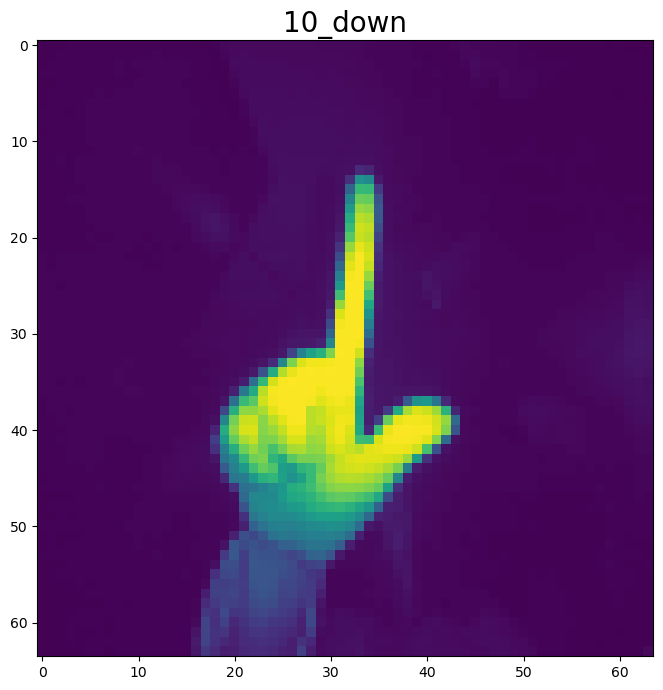

In [47]:
plt.figure(figsize=(25,8))
plt.imshow(X[66].reshape(w,h))
plt.title(enc.inverse_transform(y[0].reshape(1,10))[0][0],size = 20)
plt.show()

In [48]:
y[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.])

# **Segmentation in Traing and Test Data Sets**

In [49]:

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.1)

In [50]:
print('Train data    :'+str(X_train.shape))
print('Test data     :'+str(X_test.shape))
print('Train Output  :'+str(y_train.shape))
print('Test Output   :'+str(y_test.shape))

Train data    :(18000, 64, 64, 1)
Test data     :(2000, 64, 64, 1)
Train Output  :(18000, 10)
Test Output   :(2000, 10)


In [51]:
def conv_block(filters):
    block = tf.keras.Sequential([
        tf.keras.layers.SeparableConv2D(filters, 3, activation='relu', padding='same'),
        tf.keras.layers.SeparableConv2D(filters, 3, activation='relu', padding='same'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPool2D()
    ])
    return block

def dense_block(units, dropout_rate):
    block = tf.keras.Sequential([
        tf.keras.layers.Dense(units, activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(dropout_rate)
    ])
    return block

def build_model(act, final_class, w, h):
    model = tf.keras.Sequential([
        tf.keras.Input(shape=(w, h, 1)),
        
        tf.keras.layers.Conv2D(16, 3, activation=act, padding='same'),
        tf.keras.layers.Conv2D(16, 3, activation=act, padding='same'),
        tf.keras.layers.MaxPool2D(),
        
        conv_block(32),
        conv_block(64),
        
        conv_block(128),
        tf.keras.layers.Dropout(0.3),  # Increased dropout rate
        
        conv_block(256),
        tf.keras.layers.Dropout(0.3),  # Increased dropout rate
        
        tf.keras.layers.Flatten(),
        dense_block(512, 0.5),  # Increased dropout rate
        dense_block(128, 0.4),  # Increased dropout rate
        dense_block(64, 0.3),
        
        tf.keras.layers.Dense(final_class, activation='sigmoid')
    ])
    return model


In [52]:
def wrap(output_results, optimizer, activation, history):
    """
    Appends training history results to the output DataFrame.

    Parameters:
    - output_results (pd.DataFrame): Existing DataFrame to which results will be appended.
    - optimizer (str): Optimizer used during training.
    - activation (str): Activation function used in the model.
    - history (tf.keras.callbacks.History): Training history.

    Returns:
    pd.DataFrame: Updated DataFrame containing appended results.
    """
    epochs = np.arange(1, len(history.history['loss']) + 1, 1)
    optimizer_list = np.repeat(optimizer, len(epochs)).tolist()
    activation_list = np.repeat(activation, len(epochs)).tolist()

    cumulative_res = {
        'Epochs': epochs,
        'Optimizer': optimizer_list,
        'Activation_Function': activation_list,
        'Train_Loss': history.history['loss'],
        'Train_Accuracy': history.history['accuracy'],
        'Train_Precision': history.history['precision'],
        'Train_Recall': history.history['recall'],
        'Val_Loss': history.history['val_loss'],
        'Val_Accuracy': history.history['val_accuracy'],
        'Val_Precision': history.history['val_precision'],
        'Val_Recall': history.history['val_recall']
    }

    result_df = pd.DataFrame(cumulative_res)

    # Ensure that output_results is a DataFrame
    if not isinstance(output_results, pd.DataFrame):
        output_results = pd.DataFrame(columns=result_df.columns)

    output_results = pd.concat([output_results, result_df], ignore_index=True)
    return output_results


In [53]:
Optimisers = ['RMSprop','Adam','Adadelta','Adagrad']
Activation_function =['relu','sigmoid','softmax','tanh','softsign','selu','elu']

# **Optimizer Analytics**

In [59]:
Training_Output_Results =pd.DataFrame(columns=['Epochs','Optimizer','Activation_Function','Train_Loss','Train_Accuracy','Train_Precision','Train_Recall','Val_Loss','Val_Accuracy','Val_Precision','Val_Recall'])


In [60]:
def Optimise_verify(Training_Output_Results):
    for opt in Optimisers:
        model = build_model(Activation_function[0], final_class , w , h)
        METRICS = [
                'accuracy',
                tf.keras.metrics.Precision(name='precision'),
                tf.keras.metrics.Recall(name='recall')
        ]  
        model.compile(
                optimizer=opt,
                loss='categorical_crossentropy',
                metrics=METRICS
            )
        history = model.fit(X_train, y_train, epochs=10, validation_split=0.3, batch_size=15,verbose=0,shuffle=True)
        Training_Output_Results = wrap(Training_Output_Results , opt,Activation_function[0],history)
        print('---------------------Round for '+opt+' Completed-----------------------------------------')
    return Training_Output_Results
    


In [61]:
Training_Output_Results=Training_Output_Results.sample(frac = 1) 
print(Training_Output_Results.shape)
Training_Output_Results.to_csv('Optimizer_64X64_data.csv', index = False) 
Training_Output_Results.head()

(0, 11)


Empty DataFrame
Columns: [Epochs, Optimizer, Activation_Function, Train_Loss, Train_Accuracy, Train_Precision, Train_Recall, Val_Loss, Val_Accuracy, Val_Precision, Val_Recall]
Index: []

# **Activation Analytics**

In [63]:
Training_Output_Results =pd.DataFrame(columns=['Epochs','Optimizer','Activation_Function','Train_Loss','Train_Accuracy','Train_Precision','Train_Recall',
                                              'Val_Loss','Val_Accuracy','Val_Precision','Val_Recall'])


In [64]:
def Activation_verify(Training_Output_Results):
    for act in Activation_function:
        model = build_model(act,final_class,w,h)
        METRICS = [
                'accuracy',
                tf.keras.metrics.Precision(name='precision'),
                tf.keras.metrics.Recall(name='recall')
        ]  
        model.compile(
                optimizer=Optimisers[0],
                loss='categorical_crossentropy',
                metrics=METRICS
            )
        history = model.fit(X_train, y_train, epochs=10, validation_split=0.3, batch_size=15,verbose=0,shuffle=True)
        Training_Output_Results = wrap(Training_Output_Results , Optimisers[0],act,history)
        print('---------------------Round for '+act+' Completed-----------------------------------------')
    return Training_Output_Results
    
    


In [66]:
Training_Output_Results=Training_Output_Results.sample(frac = 1) 
print(Training_Output_Results.shape)

Training_Output_Results.to_csv('Activation_64X64_data.csv', index = False)
Training_Output_Results.head()

(0, 11)


Empty DataFrame
Columns: [Epochs, Optimizer, Activation_Function, Train_Loss, Train_Accuracy, Train_Precision, Train_Recall, Val_Loss, Val_Accuracy, Val_Precision, Val_Recall]
Index: []

# **Ploting**

In [67]:
opt = pd.read_csv('./Optimizer_64X64_data.csv')
act = pd.read_csv('./Activation_64X64_data.csv')

# **Optimization**

In [68]:

scatterplot = px.area(
    data_frame=opt,  
    x="Epochs",
    y="Train_Accuracy",
    color="Optimizer",
    color_discrete_sequence=["#3a86ff", "#8338ec", "#ff006e", "#fb5607"],
    title='Train Accuracy',
    # width=500,
    # height=500,
    template='presentation',
)

pio.show(scatterplot, filename='Opt_train_acc.html')


In [69]:
scatterplot = px.area(
    data_frame=opt,
    x="Epochs",
    y="Train_Loss",
    color="Optimizer",                                              
    color_discrete_sequence=["#3a86ff", "#8338ec", "#ff006e", "#fb5607"],
    title='Train Loss',           
    #width=500,                  
    #height=500,                
    template='presentation',     
)
pyo.iplot(scatterplot, filename = 'Opt_train_loss')

In [70]:
scatterplot = px.area(
    data_frame=opt,
    x="Epochs",
    y="Train_Precision",
    color="Optimizer",                                            
    color_discrete_sequence=["#3a86ff", "#8338ec", "#ff006e", "#fb5607"],
    title='Train Precision',
    #width=500,             
    #height=500,            
    template='presentation',
)
pyo.iplot(scatterplot, filename = 'Opt_train_prec')

In [32]:
scatterplot = px.area(
    data_frame=opt,
    x="Epochs",
    y="Train_Recall",
    color="Optimizer",                                             
    color_discrete_sequence=["#3a86ff", "#8338ec", "#ff006e", "#fb5607"],
    title='Train Recall',
    #width=500,          
    #height=500,         
    template='presentation',
)
pyo.iplot(scatterplot, filename = 'Opt_train_recall')

In [34]:
scatterplot = px.area(
    data_frame=opt,
    x="Epochs",
    y="Val_Precision",
    color="Optimizer",                                              
    color_discrete_sequence=["#3a86ff", "#8338ec", "#ff006e", "#fb5607"],   
    facet_col='Optimizer',      
    facet_col_wrap=2,           
    title='Validation Precision',          
    #width=500,                  
    #height=500,                
    template='presentation',    
)
pyo.iplot(scatterplot, filename = 'Opt_val_prec')

In [ ]:
scatterplot = px.area(
    data_frame=opt,
    x="Epochs",
    y="Val_Recall",
    color="Optimizer",                                              
    color_discrete_sequence=["#3a86ff", "#8338ec", "#ff006e", "#fb5607"],   
    facet_col='Optimizer',      
    facet_col_wrap=2,           
    title='Validation Recall',  
    #width=500,                 
    #height=500,                
    template='presentation',     
)
pyo.iplot(scatterplot, filename = 'Opt_val_recall')

In [36]:
scatterplot = px.area(
    data_frame=opt,
    x="Epochs",
    y="Val_Loss",
    color="Optimizer",                                              
    color_discrete_sequence=["#3a86ff", "#8338ec", "#ff006e", "#fb5607"],   
    title='Validation Loss',
    template='presentation',   
)
pyo.iplot(scatterplot, filename = 'Opt_val_loss')

# Activation Function

In [ ]:

scatterplot = px.area(
    data_frame=act,
    x="Epochs",
    y="Train_Accuracy",
    color="Activation_Function",                                              
    color_discrete_sequence=["#3a86ff", "#8338ec", "#ff006e", "#fb5607"],   
    title='Train Accuracy',
    template='presentation',
)
pyo.iplot(scatterplot, filename = 'Act_train_acc')

In [38]:
scatterplot = px.area(
    data_frame=act,
    x="Epochs",
    y="Train_Loss",
    color="Activation_Function",                                              
    color_discrete_sequence=["#3a86ff", "#8338ec", "#ff006e", "#fb5607"],   
    title='Train Loss',
    template='presentation',     
)
pyo.iplot(scatterplot, filename = 'Act_train_loss')

In [ ]:

scatterplot = px.area(
    data_frame=act,
    x="Epochs",
    y="Train_Precision",
    color="Activation_Function",
    color_discrete_sequence=["#3a86ff", "#8338ec", "#ff006e", "#fb5607"],
    title='Train Precision',
    template='presentation',
)
pyo.iplot(scatterplot, filename = 'Act_train_prec')

In [40]:

scatterplot = px.area(
    data_frame=act,
    x="Epochs",
    y="Train_Recall",
    color="Activation_Function",                                            
    color_discrete_sequence=["#3a86ff", "#8338ec", "#ff006e", "#fb5607"],   
    title='Train Recall',
    template='presentation',
)
pyo.iplot(scatterplot, filename = 'Act_train_rec')

In [ ]:

tab_opt = opt[opt['Epochs']==10]
final_col = np.delete(tab_opt.columns[0:], [0,2])
fig = go.Figure(data=[go.Table(
    header=dict(values=list(final_col),
                fill_color='paleturquoise',
                align='left'),
    cells=dict(values=[tab_opt.Optimizer , tab_opt.Train_Loss,tab_opt.Train_Accuracy,tab_opt.Train_Precision,tab_opt.Train_Recall,tab_opt.Val_Loss,tab_opt.Val_Accuracy,tab_opt.Val_Precision,tab_opt.Val_Recall],
               fill_color='lavender',
               align='left'))
])

fig.show()

In [42]:

ty =opt[opt['Epochs']==10].iloc[:,3:]
nm = ty.columns
ty = ty.values.tolist()
data = []

for j in range(len(nm)):
        lt = []
        for i in range(len(Optimisers)):
            lt.append(ty[i][j])
            
        data.append(go.Bar(name = nm[j],x=Optimisers, y=lt))
fig = go.Figure(data=data)
# Change the bar mode
fig.update_layout(barmode='group')
fig.show()

In [72]:

tab_opt = act[act['Epochs']==10]
final_col = np.delete(tab_opt.columns[0:], [0,1])
fig = go.Figure(data=[go.Table(
    header=dict(values=list(final_col),
                fill_color='paleturquoise',
                align='left'),
    cells=dict(values=[tab_opt.Activation_Function , tab_opt.Train_Loss,tab_opt.Train_Accuracy,tab_opt.Train_Precision,tab_opt.Train_Recall,tab_opt.Val_Loss,tab_opt.Val_Accuracy,tab_opt.Val_Precision,tab_opt.Val_Recall],
               fill_color='lavender',
               align='left'))
])

fig.show()

In [44]:
ty =act[act['Epochs']==10].iloc[:,3:]
nm = ty.columns
ty = ty.values.tolist()
data = []

for j in range(len(nm)):
        lt = []
        for i in range(len(Activation_function)):
            lt.append(ty[i][j])
            
        data.append(go.Bar(name = nm[j],x=Activation_function, y=lt))
fig = go.Figure(data=data)
# Change the bar mode
fig.update_layout(barmode='group')
fig.show()

# Final Model

In [73]:
def Plot(history , name , model):
    model.save(name+'.h5')
    epochs = range(1,len(history.history['loss']) + 1)
    epochs = list(epochs)
    fig = make_subplots(rows=2, cols=4,subplot_titles=("Train Loss", "Train Accuracy" , "Train Precision","Train Recall", "Validation Loss", "Validation Accuracy",
                                                      "Validation Precision","Validation Recall"))
    fig.add_trace(go.Scatter(x=epochs, y=history.history['loss']), row=1, col=1)
    fig.add_trace(go.Scatter(x=epochs, y=history.history['accuracy']), row=1, col=2)
    fig.add_trace(go.Scatter(x=epochs, y=history.history['precision']), row=1, col=3)
    fig.add_trace(go.Scatter(x=epochs, y=history.history['recall']), row=1, col=4)
    fig.add_trace(go.Scatter(x=epochs, y=history.history['val_loss']), row=2, col=1)
    fig.add_trace(go.Scatter(x=epochs, y=history.history['val_accuracy']), row=2, col=2)
    fig.add_trace(go.Scatter(x=epochs, y=history.history['val_precision']), row=2, col=3)
    fig.add_trace(go.Scatter(x=epochs, y=history.history['val_recall']), row=2, col=4)
    fig.update_layout(showlegend=False,height=1000, width=1200, title_text=name)
    pyo.iplot(fig, filename = 'Act_train_rec')

In [74]:
model = build_model('relu', final_class ,w , h)
METRICS = [
                'accuracy',
                tf.keras.metrics.Precision(name='precision'),
                tf.keras.metrics.Recall(name='recall')
]  
model.compile(
                optimizer='RMSprop',
                loss='categorical_crossentropy',
                metrics=METRICS
        )
history = model.fit(X_train, y_train, epochs=50, validation_split=0.3, batch_size=15,verbose=1,shuffle=True)

Epoch 1/50
840/840 [==============================] - 83s 86ms/step - loss: 1.3160 - accuracy: 0.5580 - precision: 0.1952 - recall: 0.8897 - val_loss: 1.2815 - val_accuracy: 0.6067 - val_precision: 0.2128 - val_recall: 0.9780
Epoch 2/50
840/840 [==============================] - 75s 89ms/step - loss: 0.2467 - accuracy: 0.9237 - precision: 0.2482 - recall: 0.9978 - val_loss: 0.0368 - val_accuracy: 0.9917 - val_precision: 0.3094 - val_recall: 0.9998
Epoch 3/50
840/840 [==============================] - 57s 67ms/step - loss: 0.1416 - accuracy: 0.9602 - precision: 0.2564 - recall: 0.9985 - val_loss: 1.2674 - val_accuracy: 0.7220 - val_precision: 0.2761 - val_recall: 0.9724
Epoch 4/50
840/840 [==============================] - 56s 67ms/step - loss: 0.1010 - accuracy: 0.9722 - precision: 0.2635 - recall: 0.9993 - val_loss: 0.0665 - val_accuracy: 0.9844 - val_precision: 0.3425 - val_recall: 0.9996
Epoch 5/50
840/840 [==============================] - 69s 82ms/step - loss: 0.0779 - accuracy: 0

KeyboardInterrupt: 

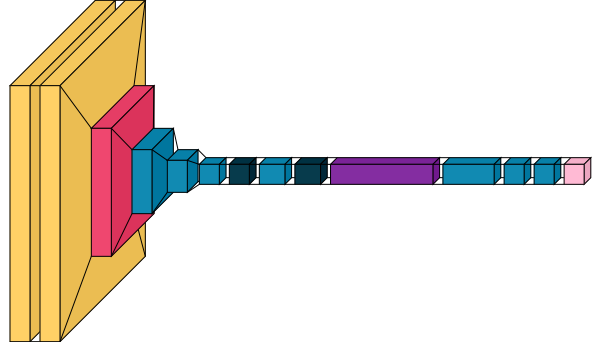

In [76]:
import visualkeras
visualkeras.layered_view(model)

In [77]:
from keras.utils import plot_model
plot_model(model, to_file='model.png',show_shapes=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


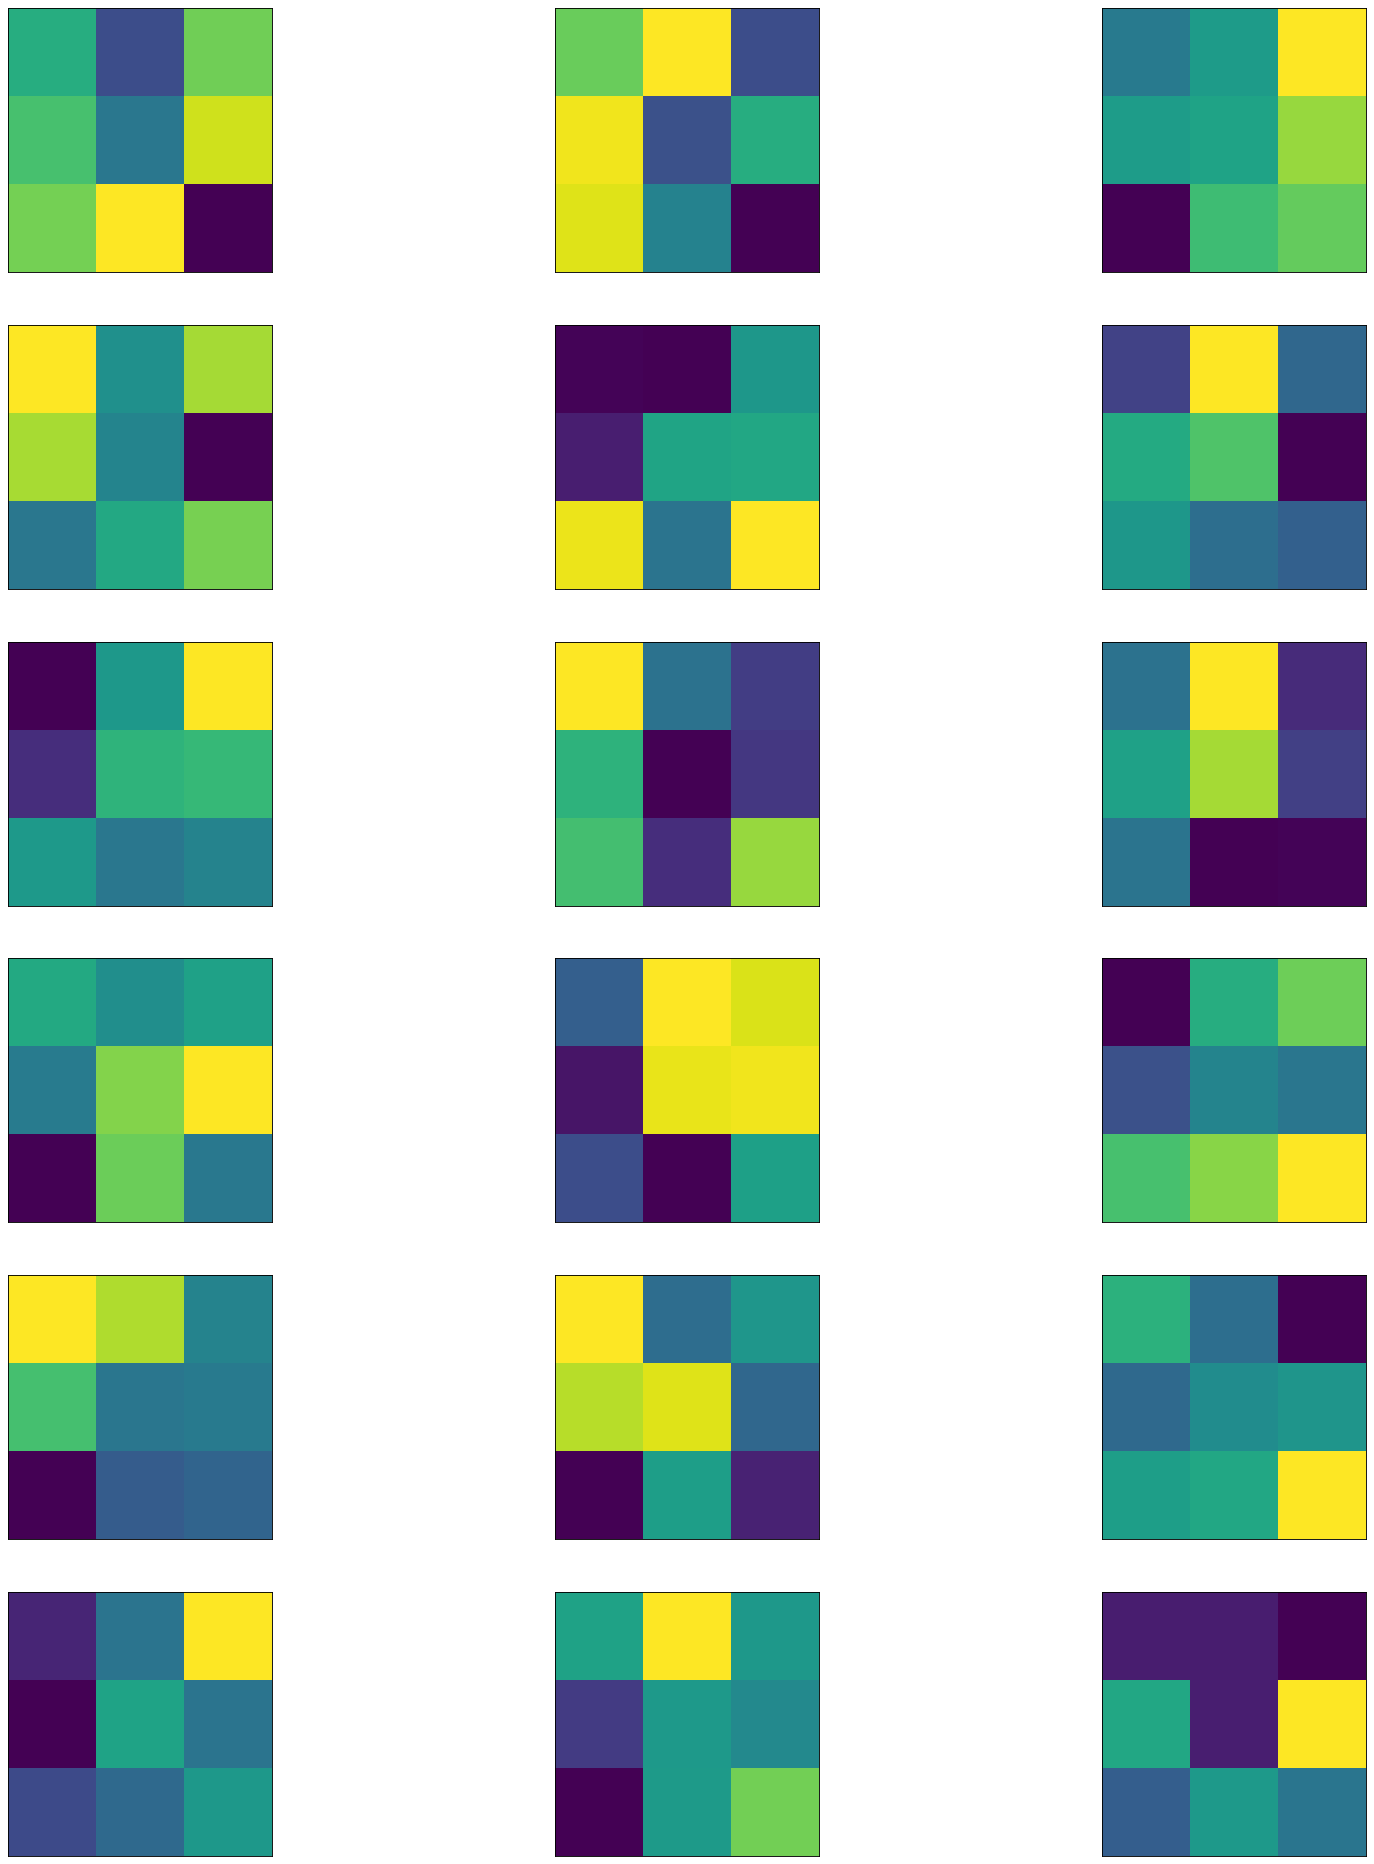

In [78]:
fig = plt.figure(num=None, figsize=(25, 30), dpi=80, facecolor='w', edgecolor='k')

filters, biases = model.layers[1].get_weights()
f_min, f_max = filters.min(), filters.max()
filters = (filters - f_min) / (f_max - f_min)
n_filters, ix = 6, 1

for i in range(n_filters):
    f = filters[:, :, :, i]
    for j in range(3):
        ax = plt.subplot(n_filters, 3, ix)
        ax.set_xticks([])
        ax.set_yticks([])
        plt.imshow(f[:, :, j])
        ix += 1

plt.show()


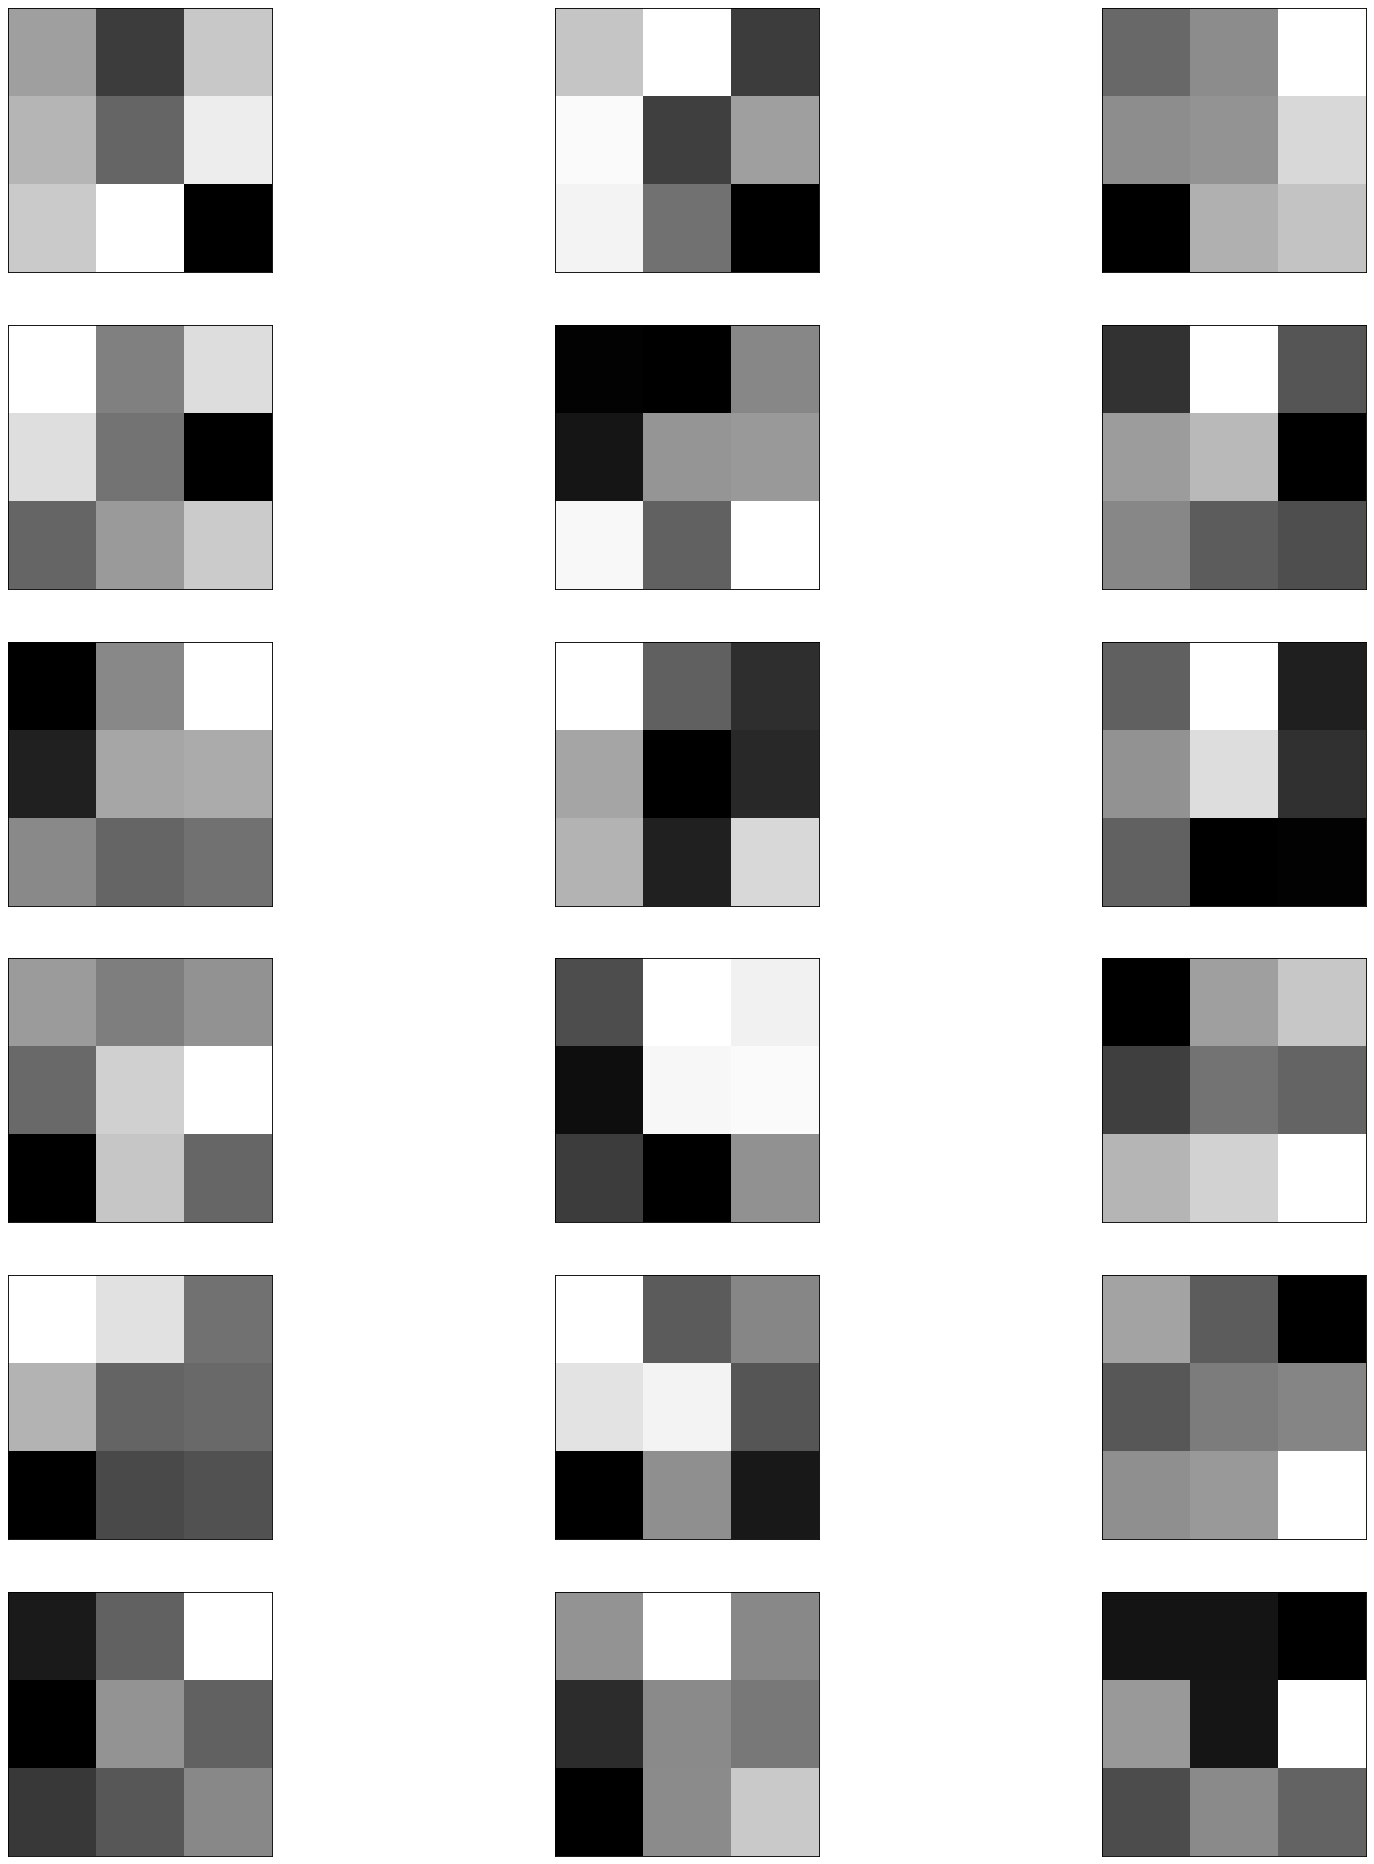

In [79]:

figure(num=None, figsize=(25, 30), dpi=80, facecolor='w', edgecolor='k')
filters, biases = model.layers[1].get_weights()
# normalize filter values to 0-1 so we can visualize them
f_min, f_max = filters.min(), filters.max()
filters = (filters - f_min) / (f_max - f_min)
# plot first few filters
n_filters, ix = 6, 1
for i in range(n_filters):
	# get the filter
	f = filters[:, :, :, i]
	# plot each channel separately
	for j in range(3):
		# specify subplot and turn of axis
		ax = plt.subplot(n_filters,3 , ix)
		ax.set_xticks([])
		ax.set_yticks([])
		# plot filter channel in grayscale
		plt.imshow(f[:, :, j],cmap='gray')
		ix += 1
# show the figure
plt.show()

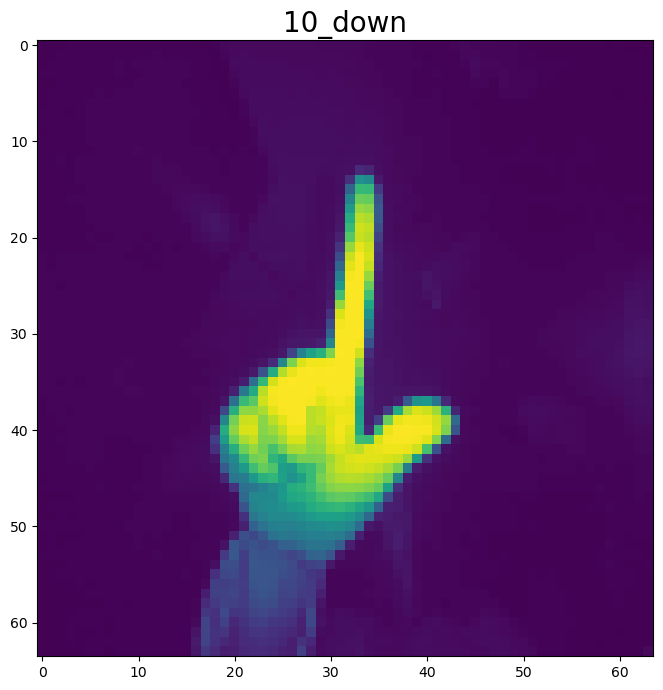

In [80]:
plt.figure(figsize=(25,8))
plt.imshow(X[66].reshape(w,h))
plt.title(enc.inverse_transform(y[0].reshape(1,10))[0][0],size = 20)
plt.show()

In [81]:

def image_transform_gray(image):
    img = expand_dims(image, axis=0)
    model1 = Model(inputs=model.inputs, outputs=model.layers[0].output)
    feature_maps = model1.predict(img)
    figure(num=None, figsize=(25, 30), dpi=80, facecolor='w', edgecolor='k')
    square = 4
    ix = 1
    for _ in range(square):
        for _ in range(square):
            ax = plt.subplot(square, square, ix)
            ax.set_xticks([])
            ax.set_yticks([])
            plt.imshow(feature_maps[0, :, :, ix-1],cmap='gray')
            ix += 1
    
    plt.show()
def image_transform(image):
    img = expand_dims(image, axis=0)
    model1 = Model(inputs=model.inputs, outputs=model.layers[0].output)
    feature_maps = model1.predict(img)
    figure(num=None, figsize=(25, 30), dpi=80, facecolor='w', edgecolor='k')
    square = 4
    ix = 1
    for _ in range(square):
        for _ in range(square):
            ax = plt.subplot(square, square, ix)
            ax.set_xticks([])
            ax.set_yticks([])
            plt.imshow(feature_maps[0, :, :, ix-1])
            ix += 1
    plt.show()

1/1 [==============================] - 1s 764ms/step


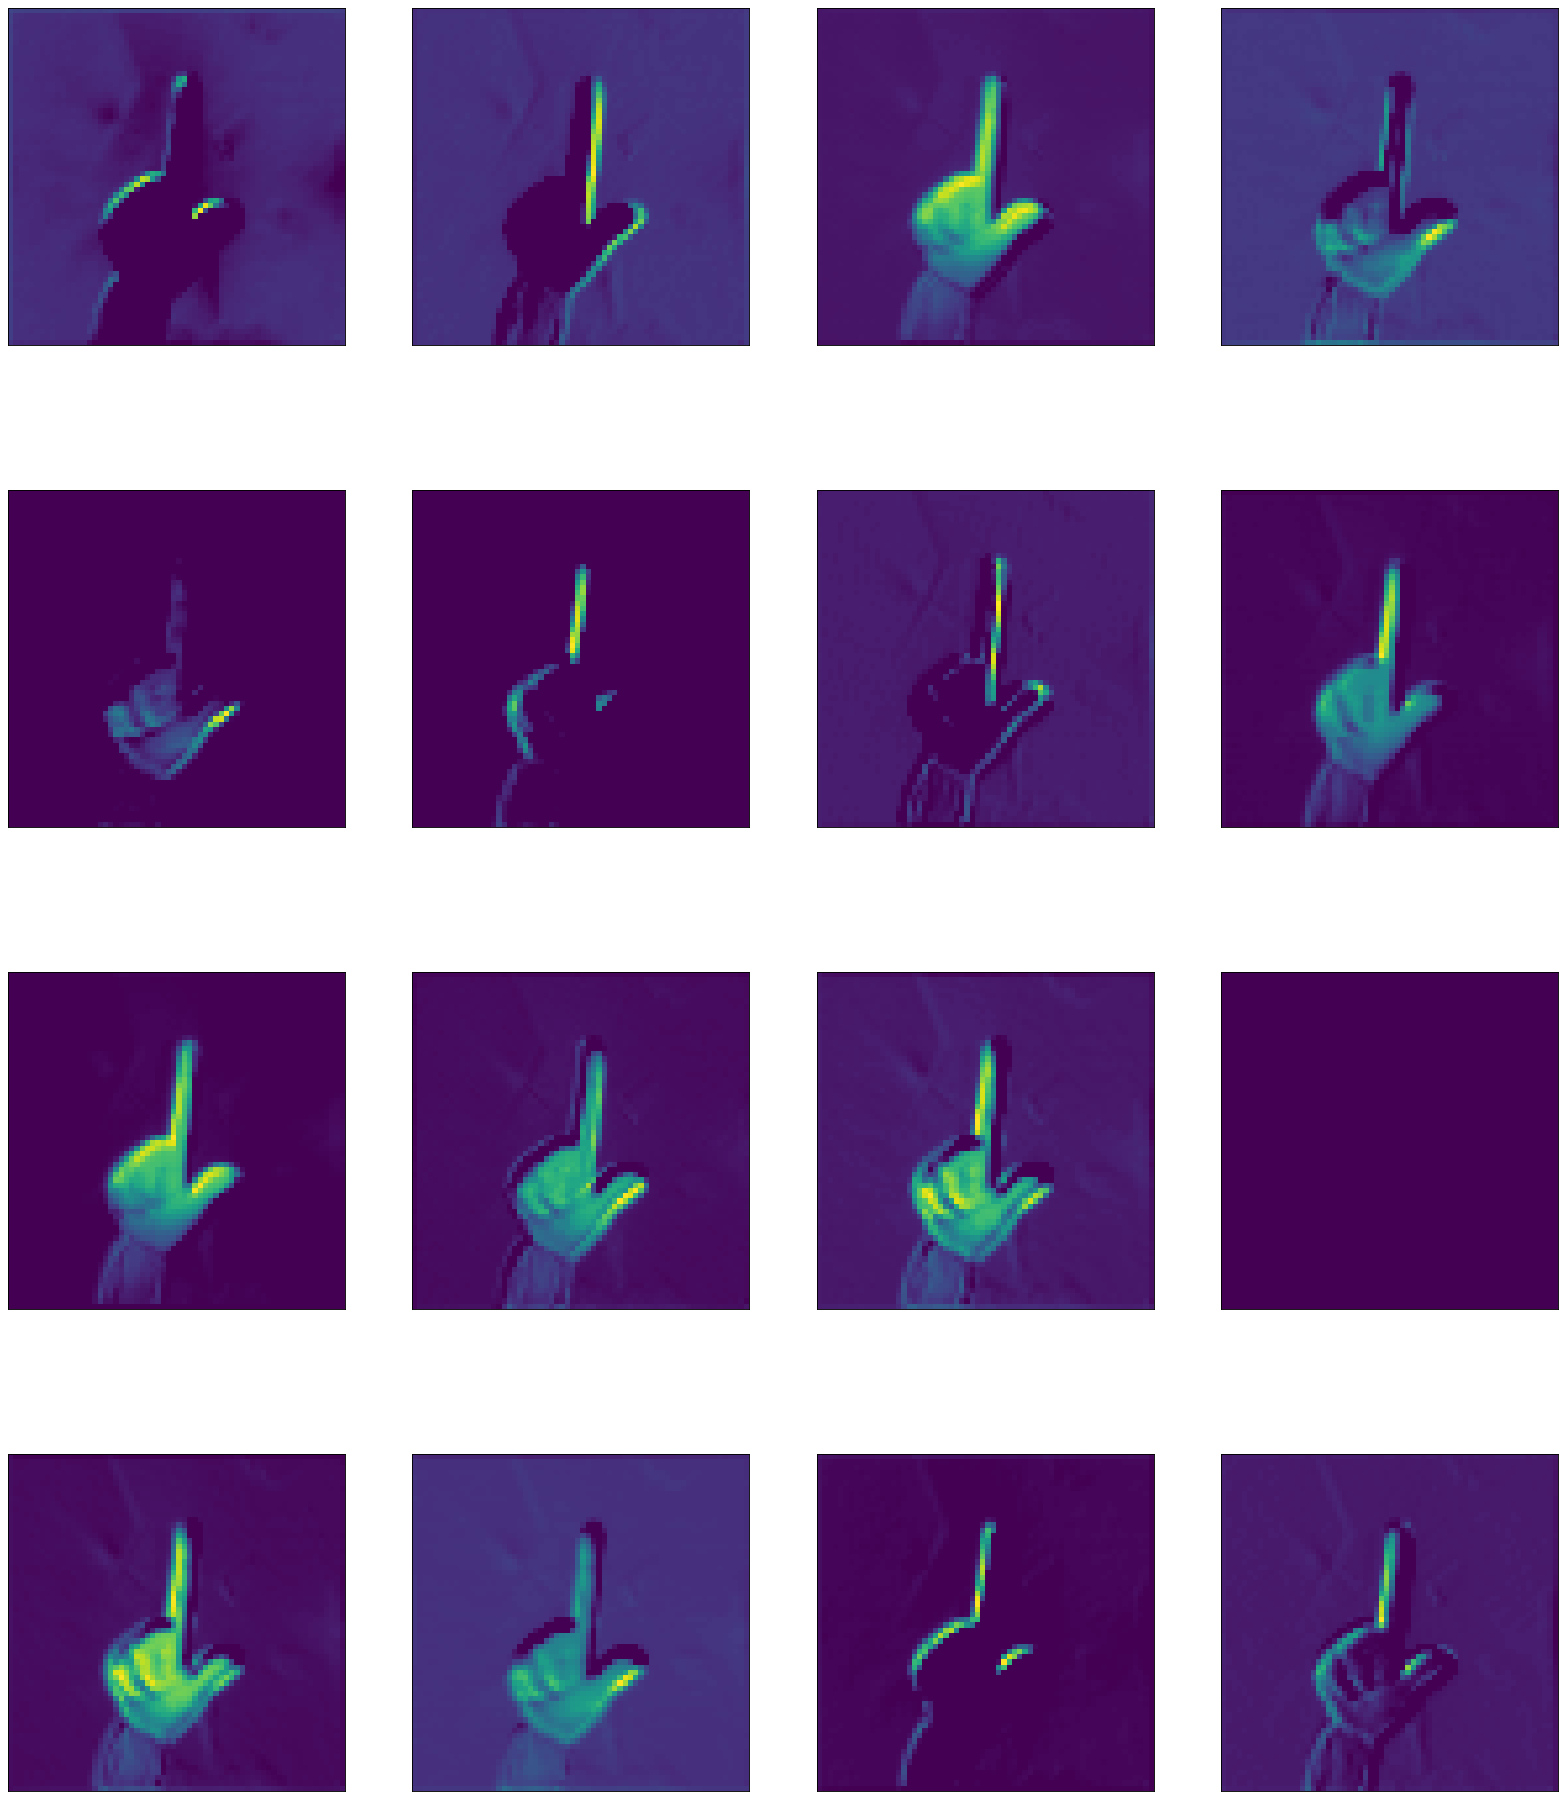

1/1 [==============================] - 0s 94ms/step


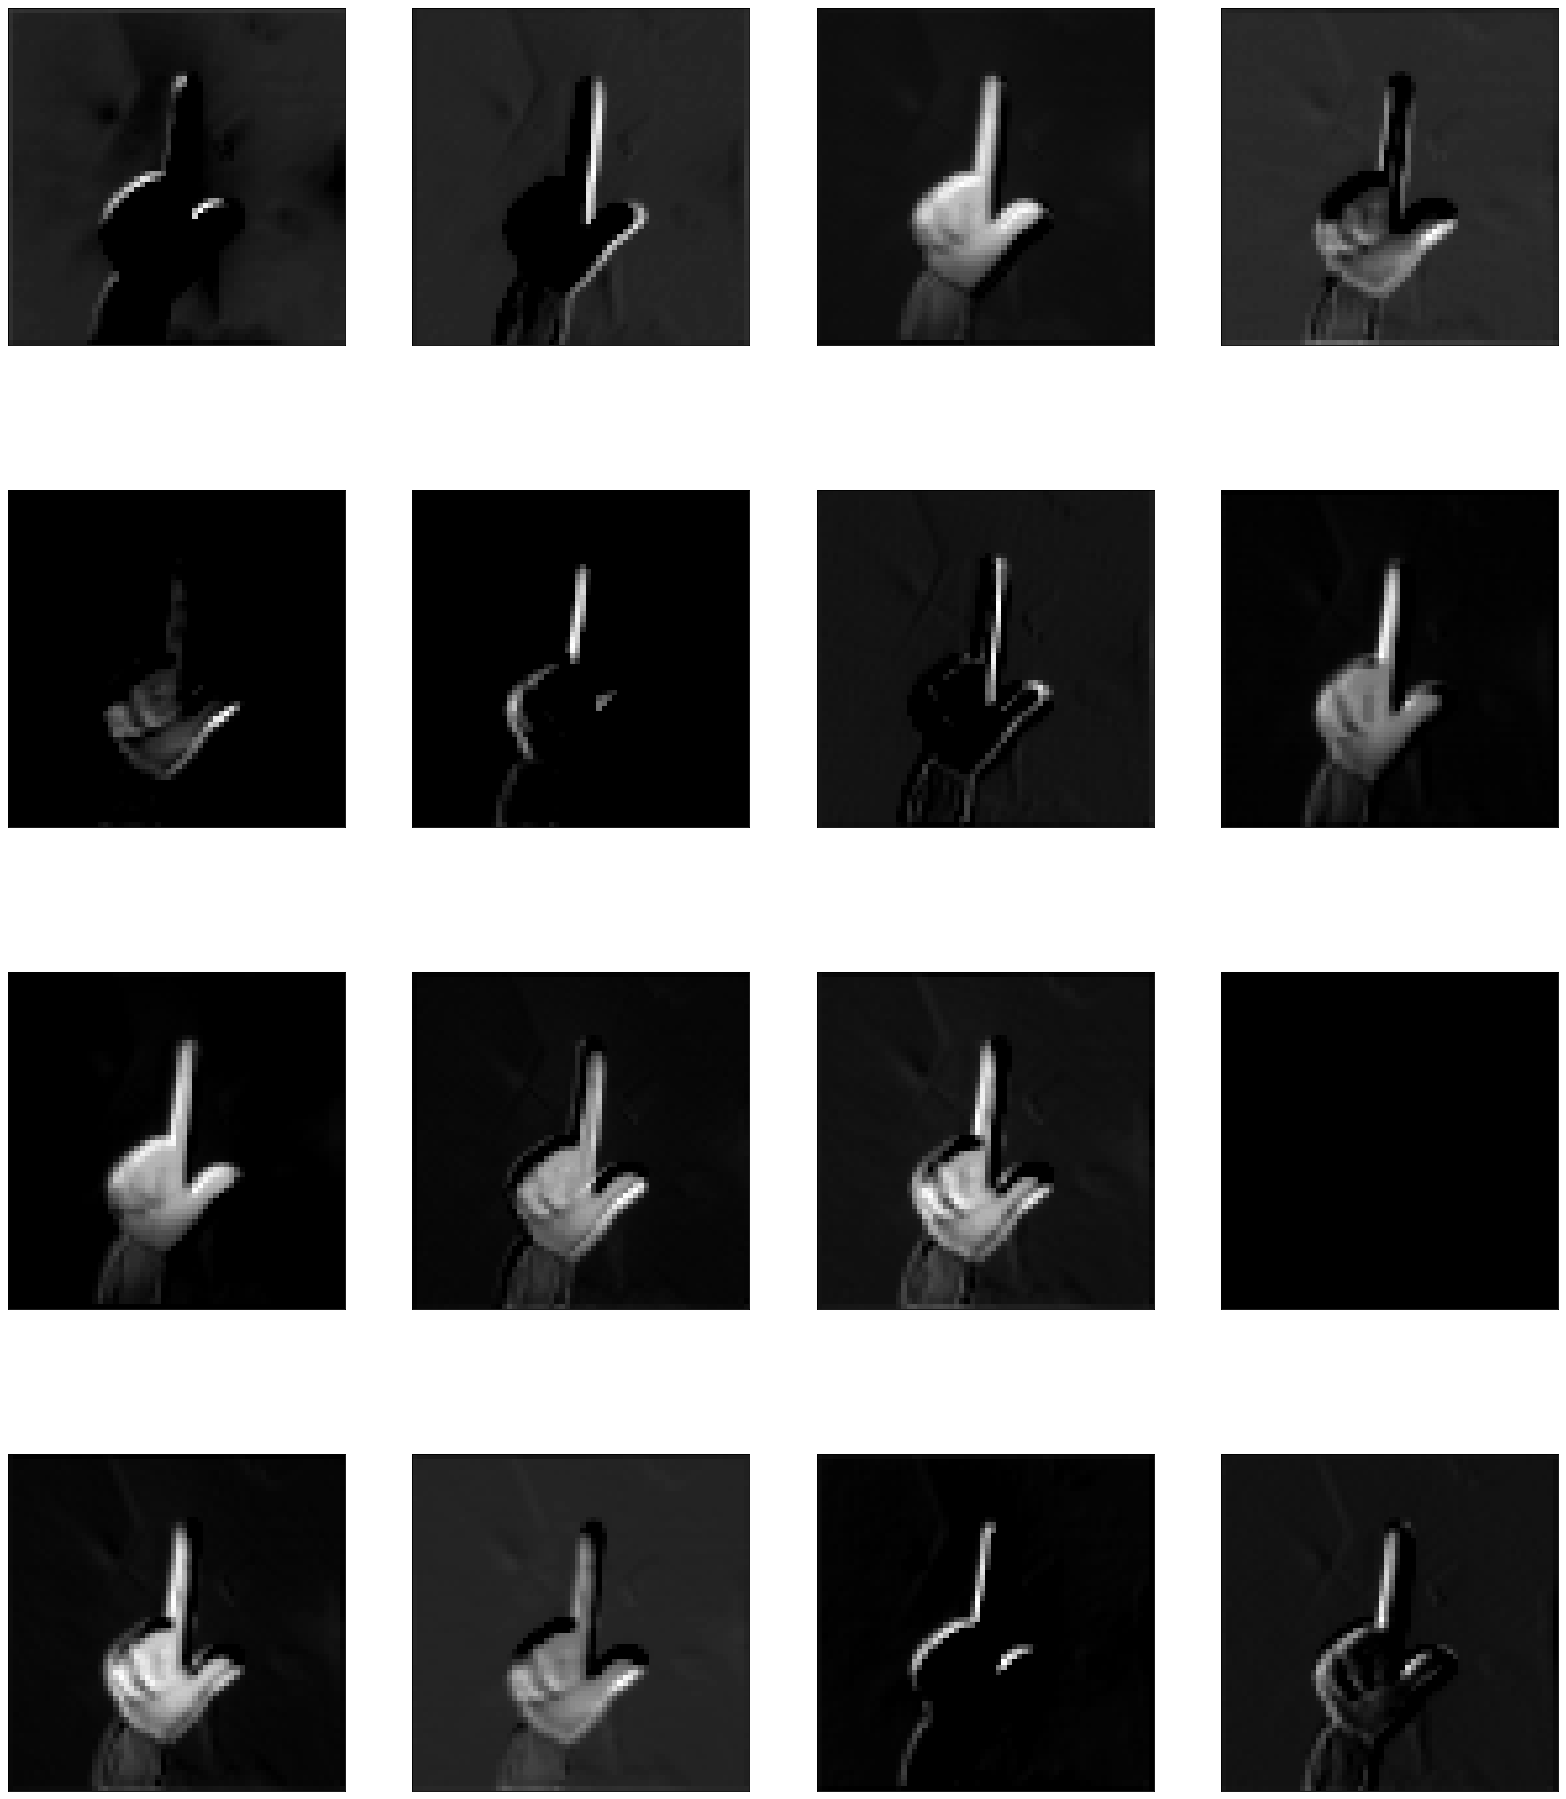

In [82]:
image_transform(X[66])
image_transform_gray(X[66])

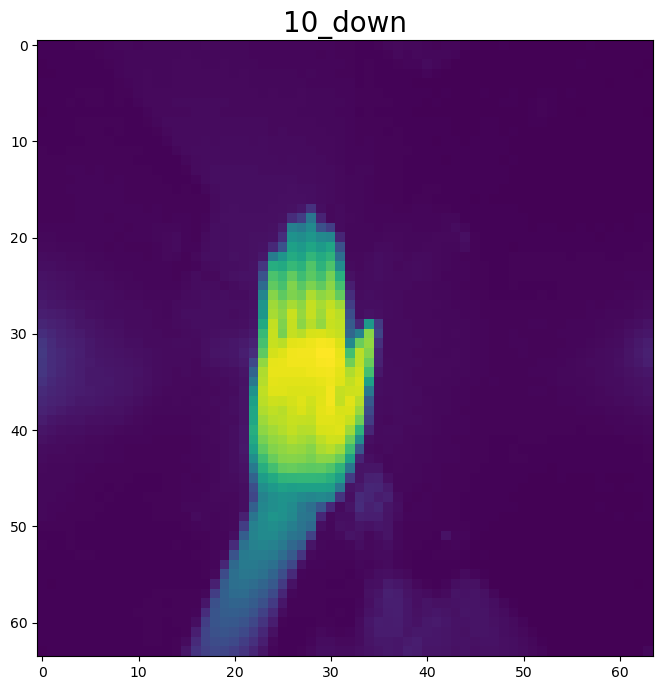

In [83]:
plt.figure(figsize=(25,8))
plt.imshow(X[56].reshape(w,h))
plt.title(enc.inverse_transform(y[0].reshape(1,10))[0][0],size = 20)
plt.show()

1/1 [==============================] - 0s 94ms/step


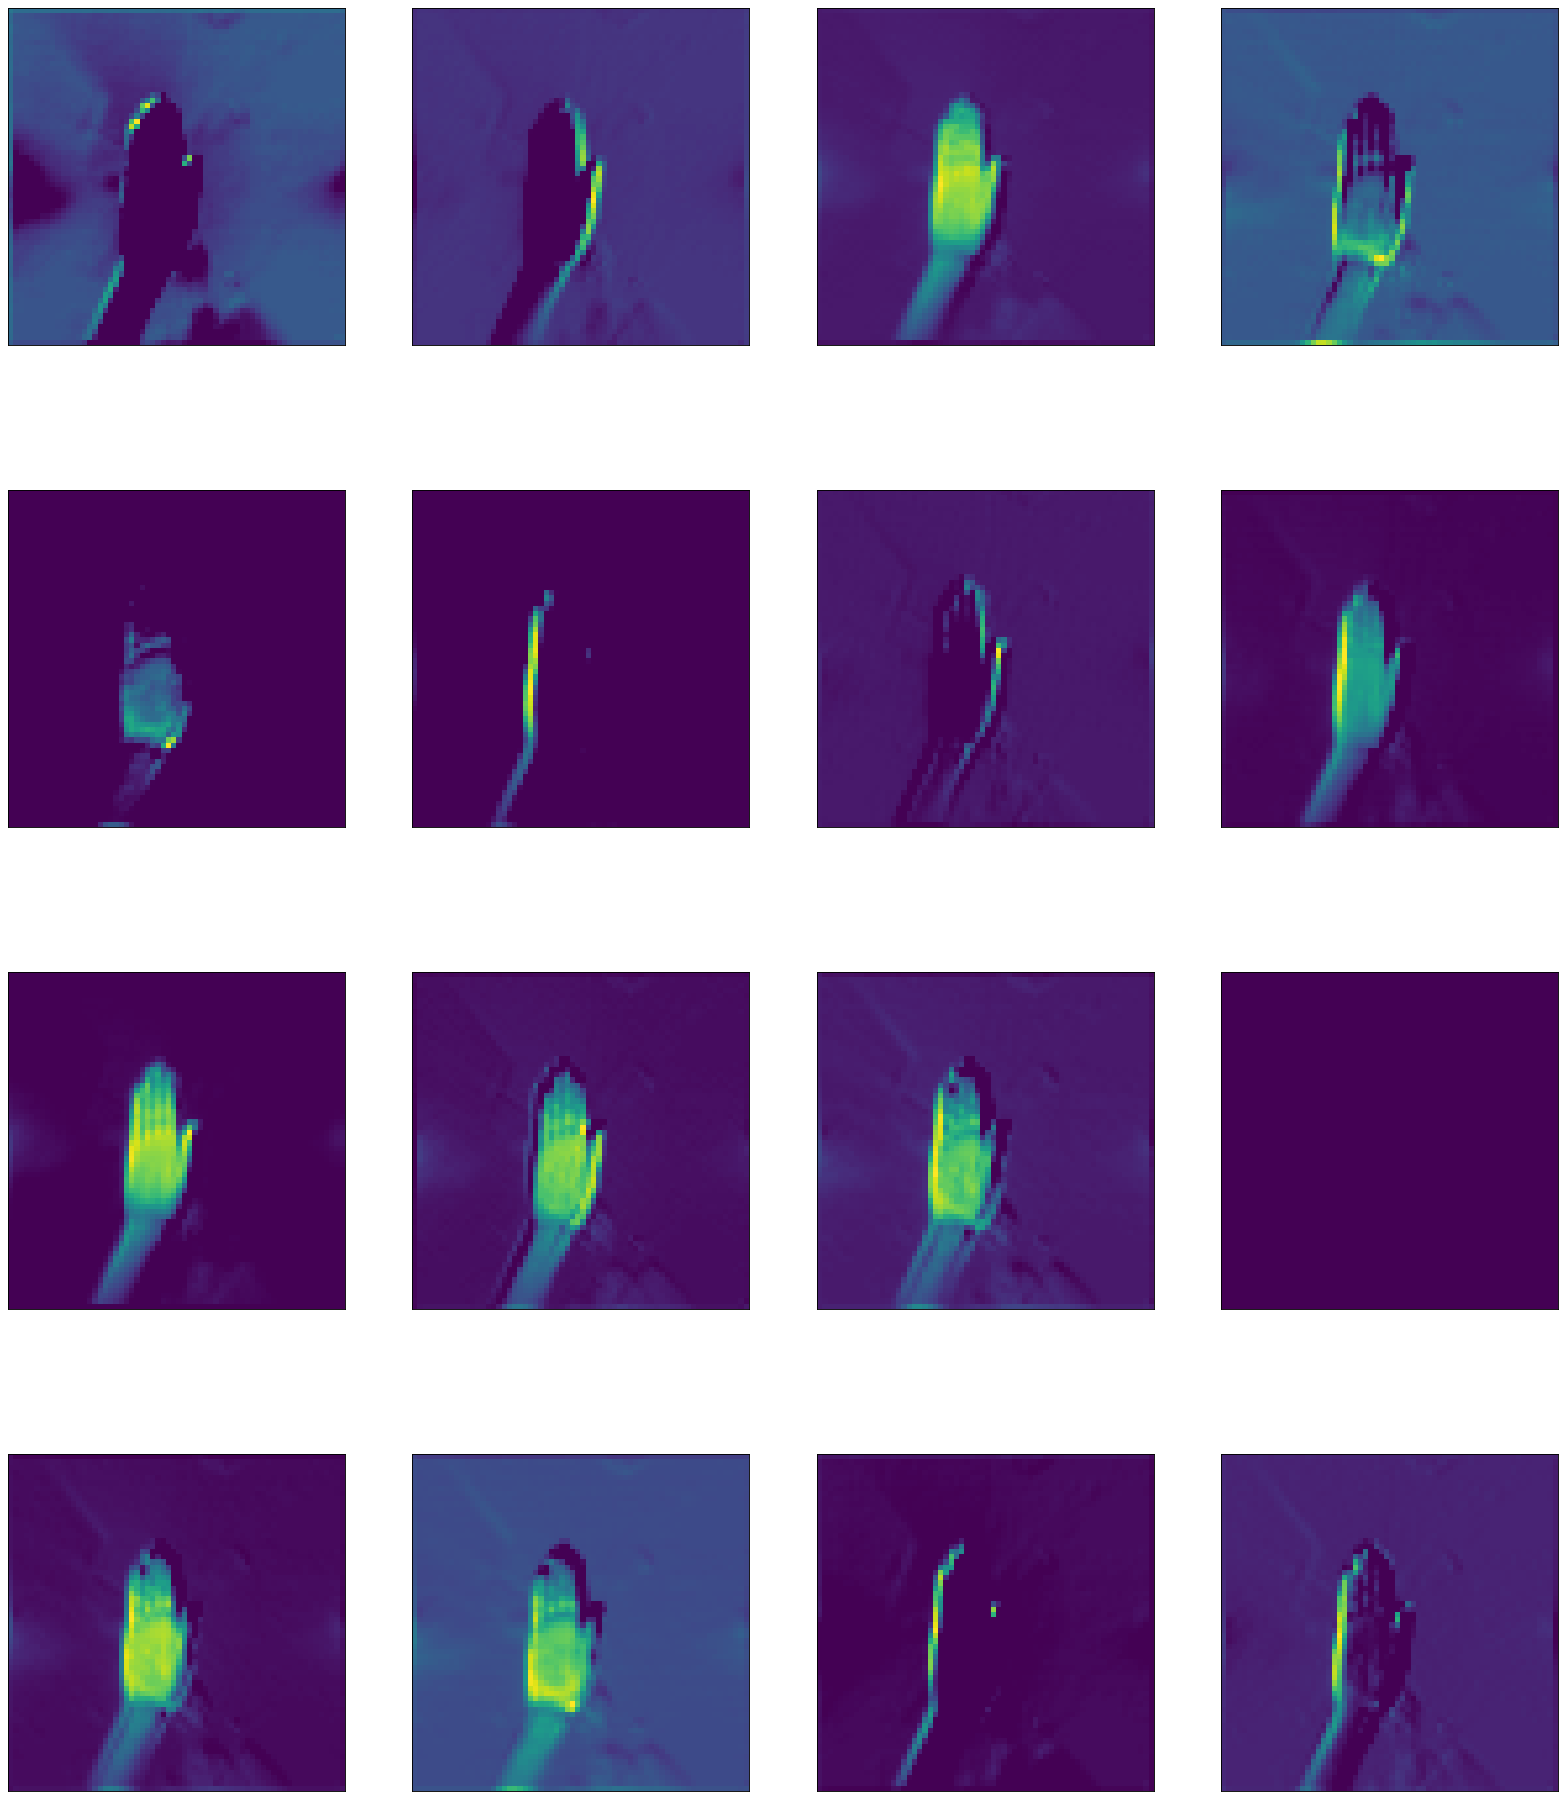

1/1 [==============================] - 0s 174ms/step


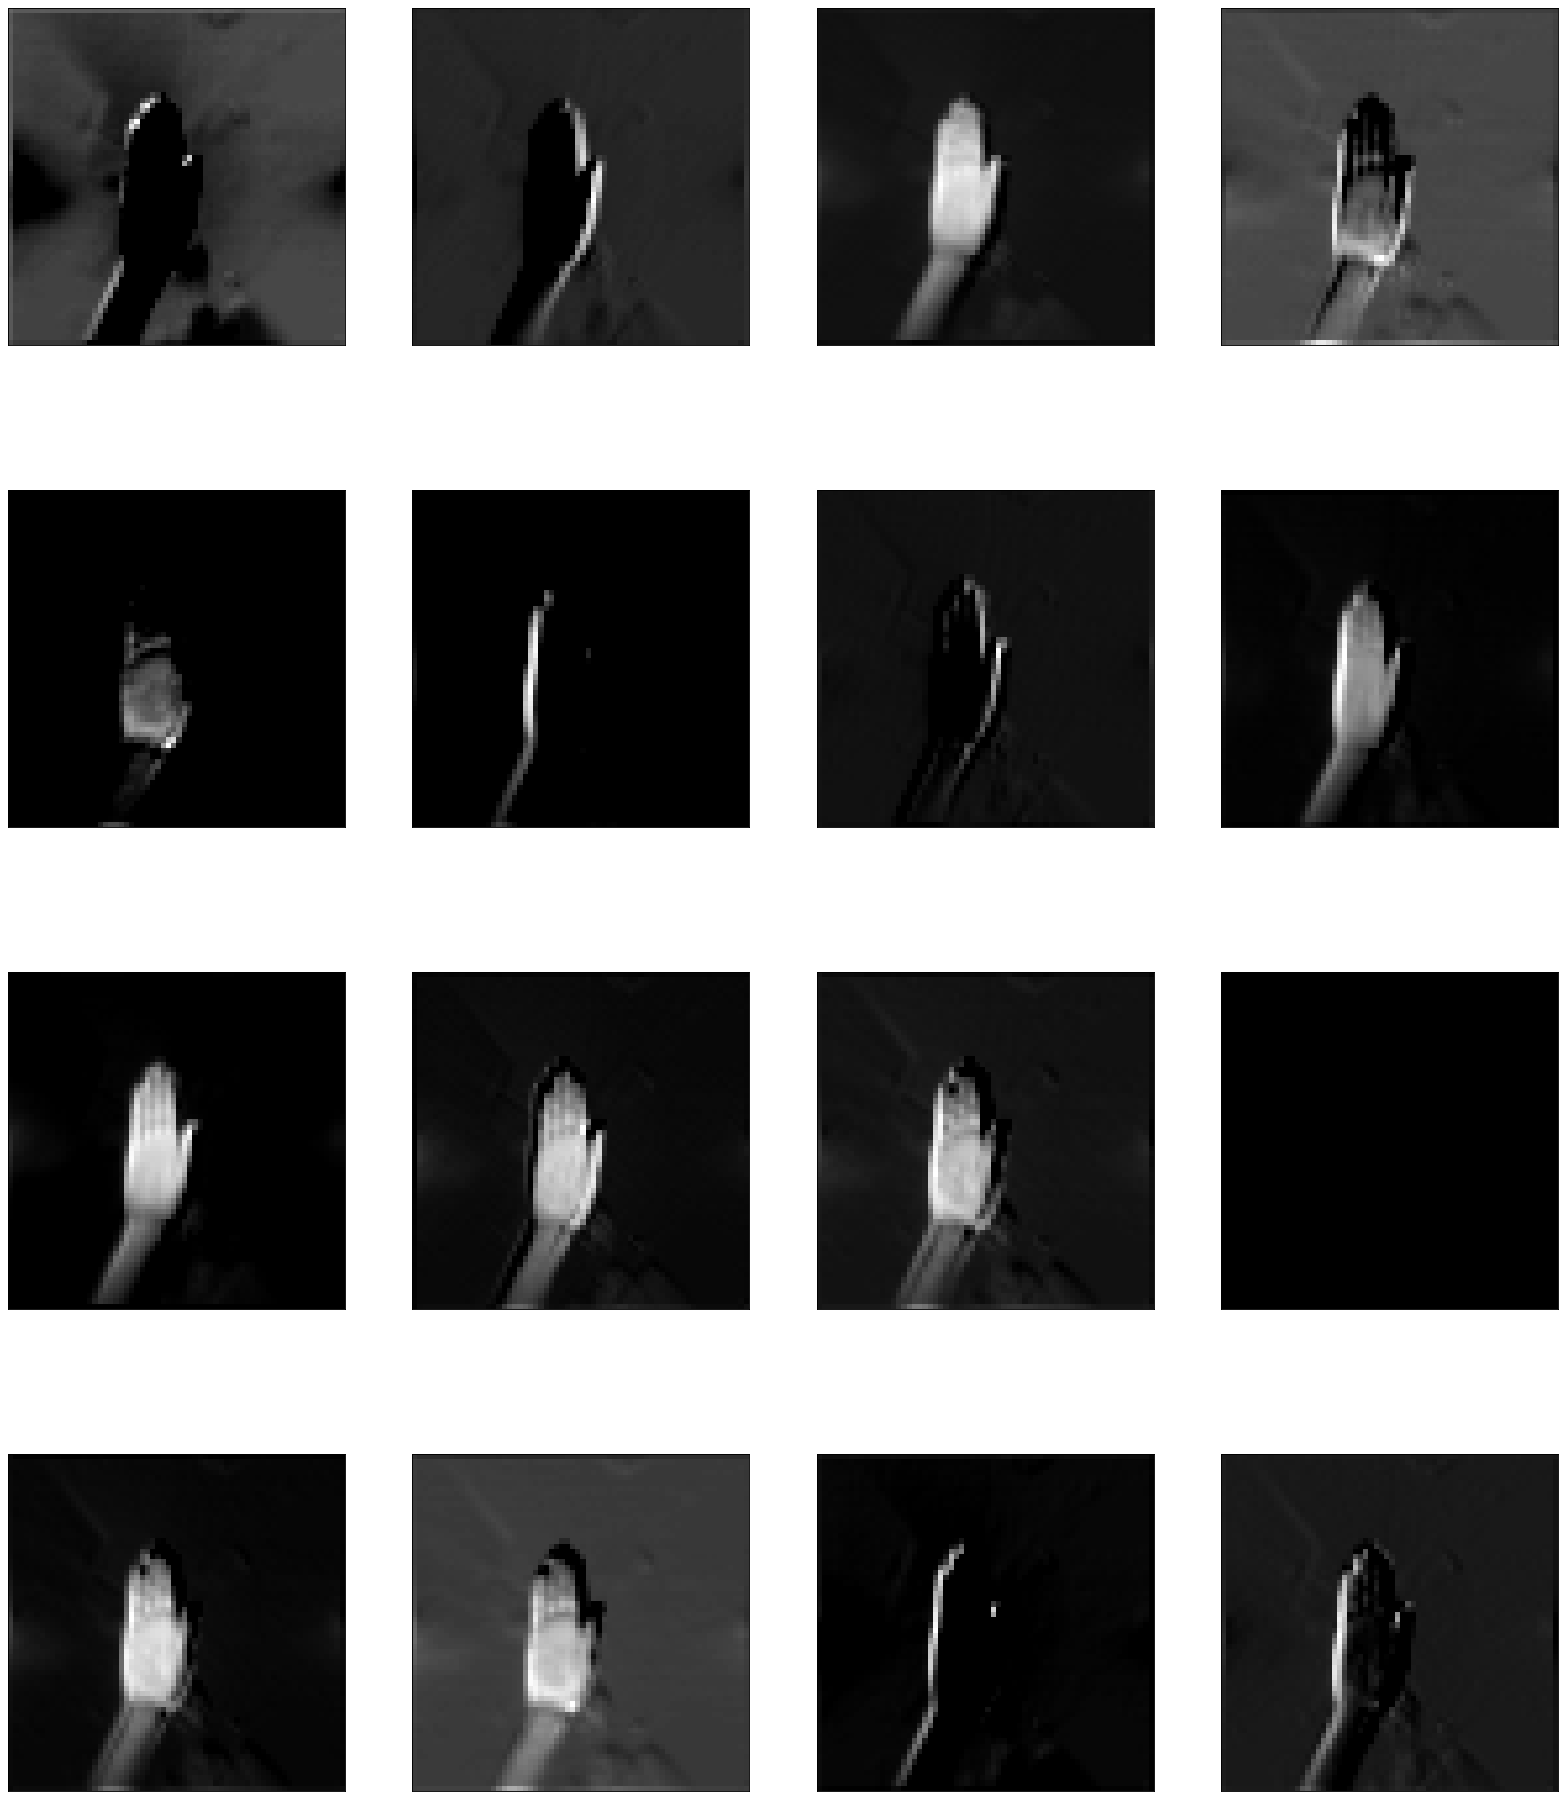

In [84]:
image_transform(X[56])
image_transform_gray(X[56])

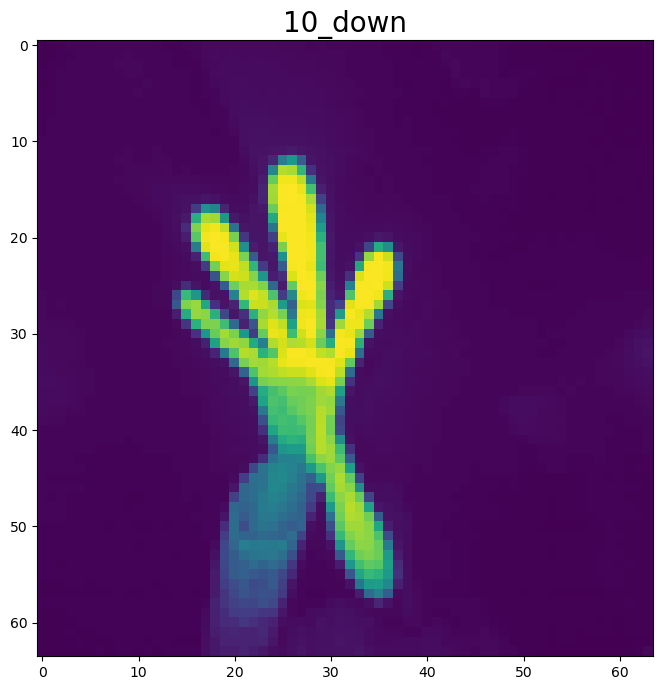

In [85]:
plt.figure(figsize=(25,8))
plt.imshow(X[1566].reshape(w,h))
plt.title(enc.inverse_transform(y[0].reshape(1,10))[0][0],size = 20)
plt.show()

1/1 [==============================] - 0s 78ms/step


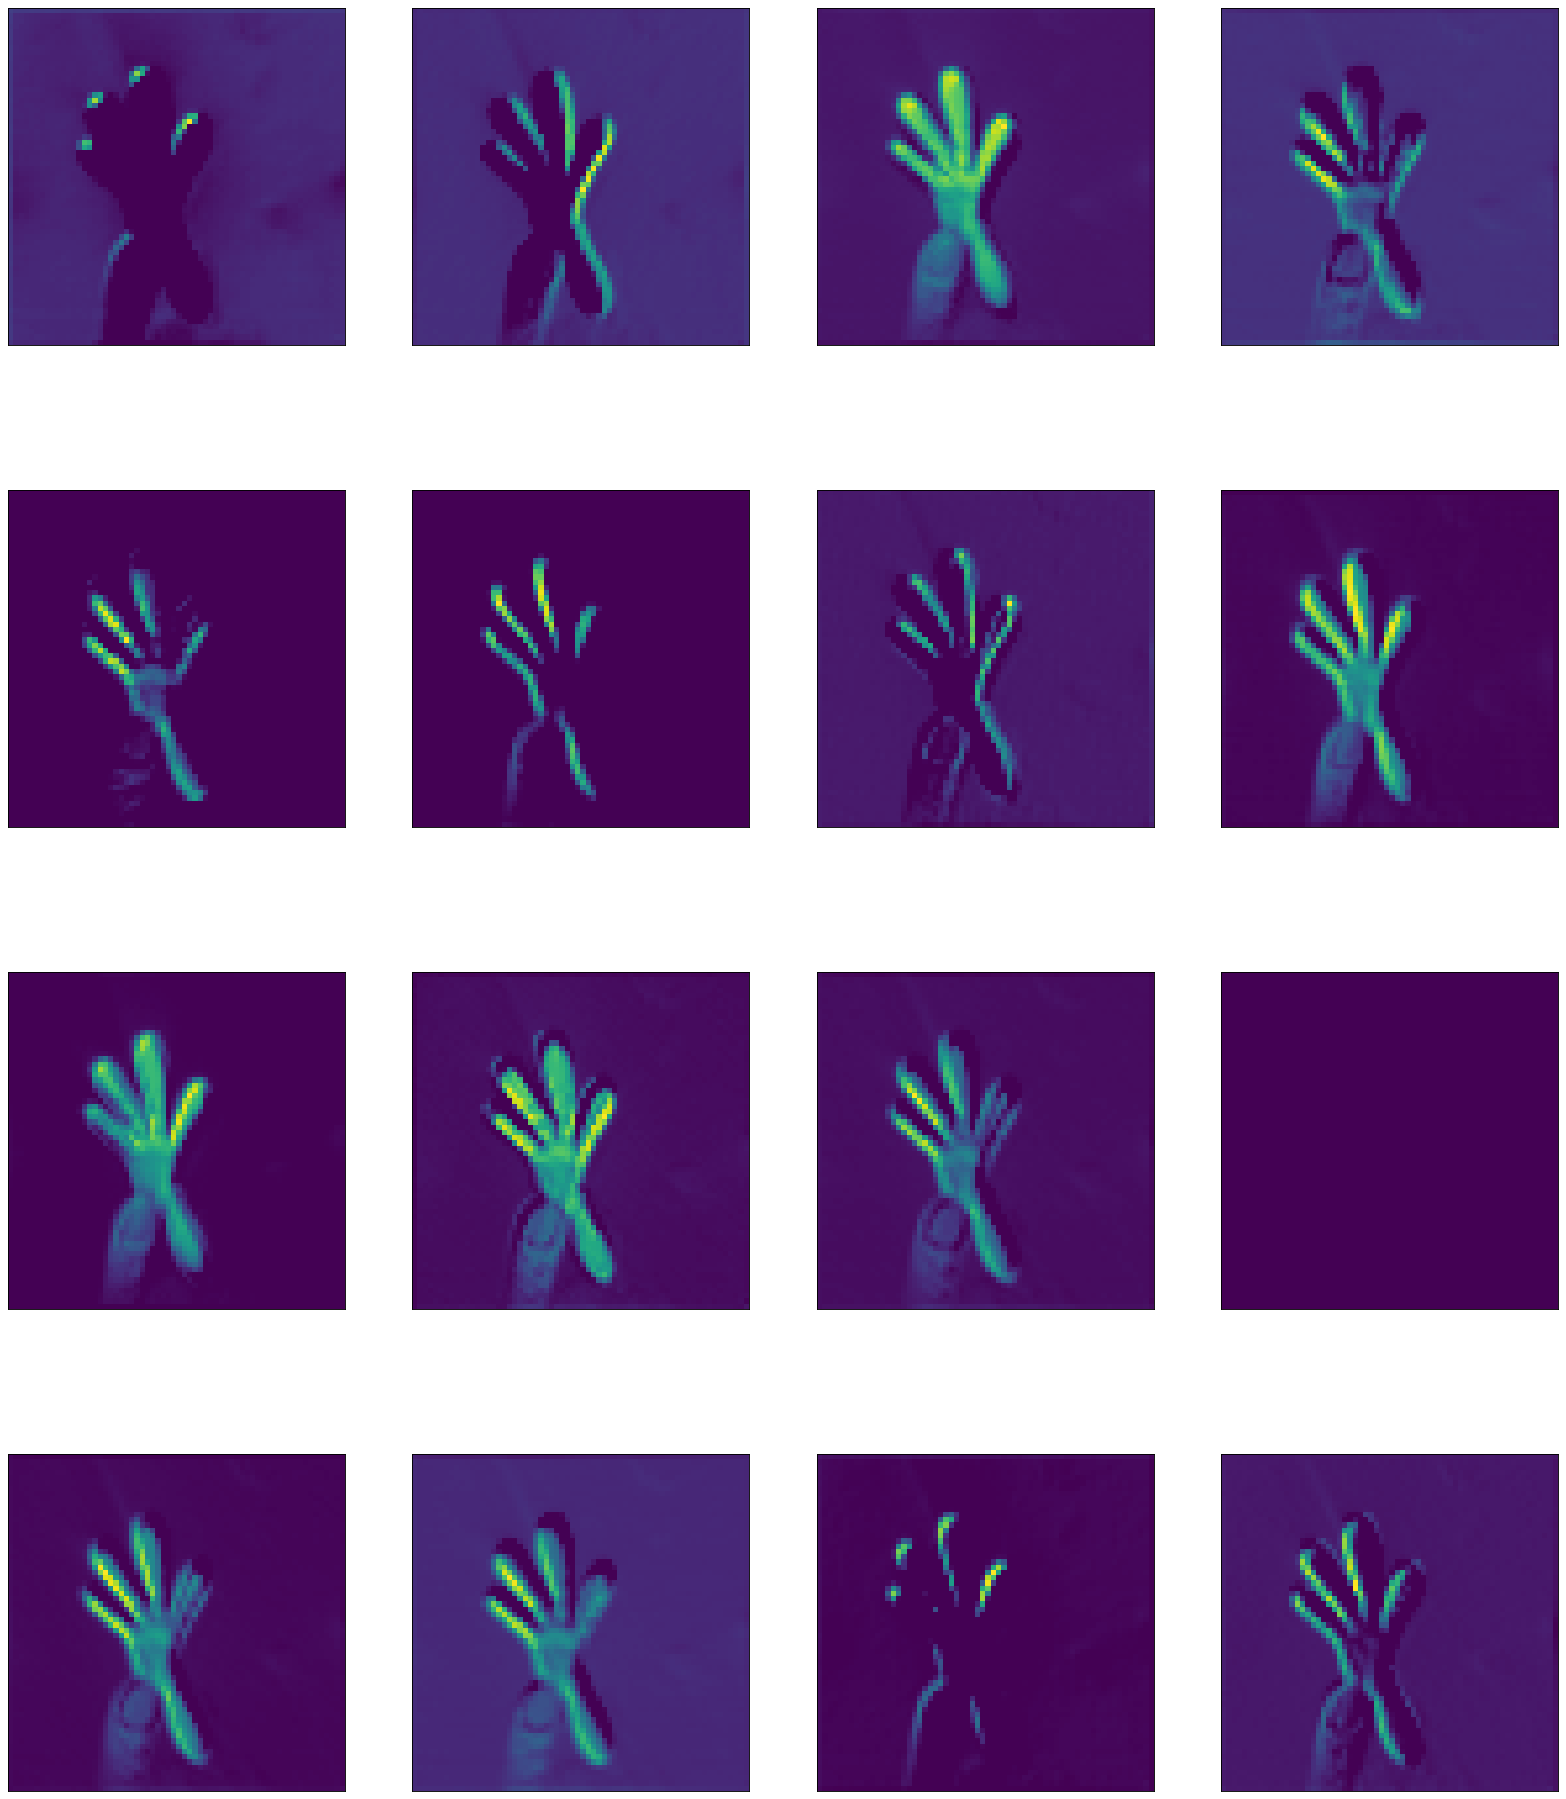

1/1 [==============================] - 0s 219ms/step


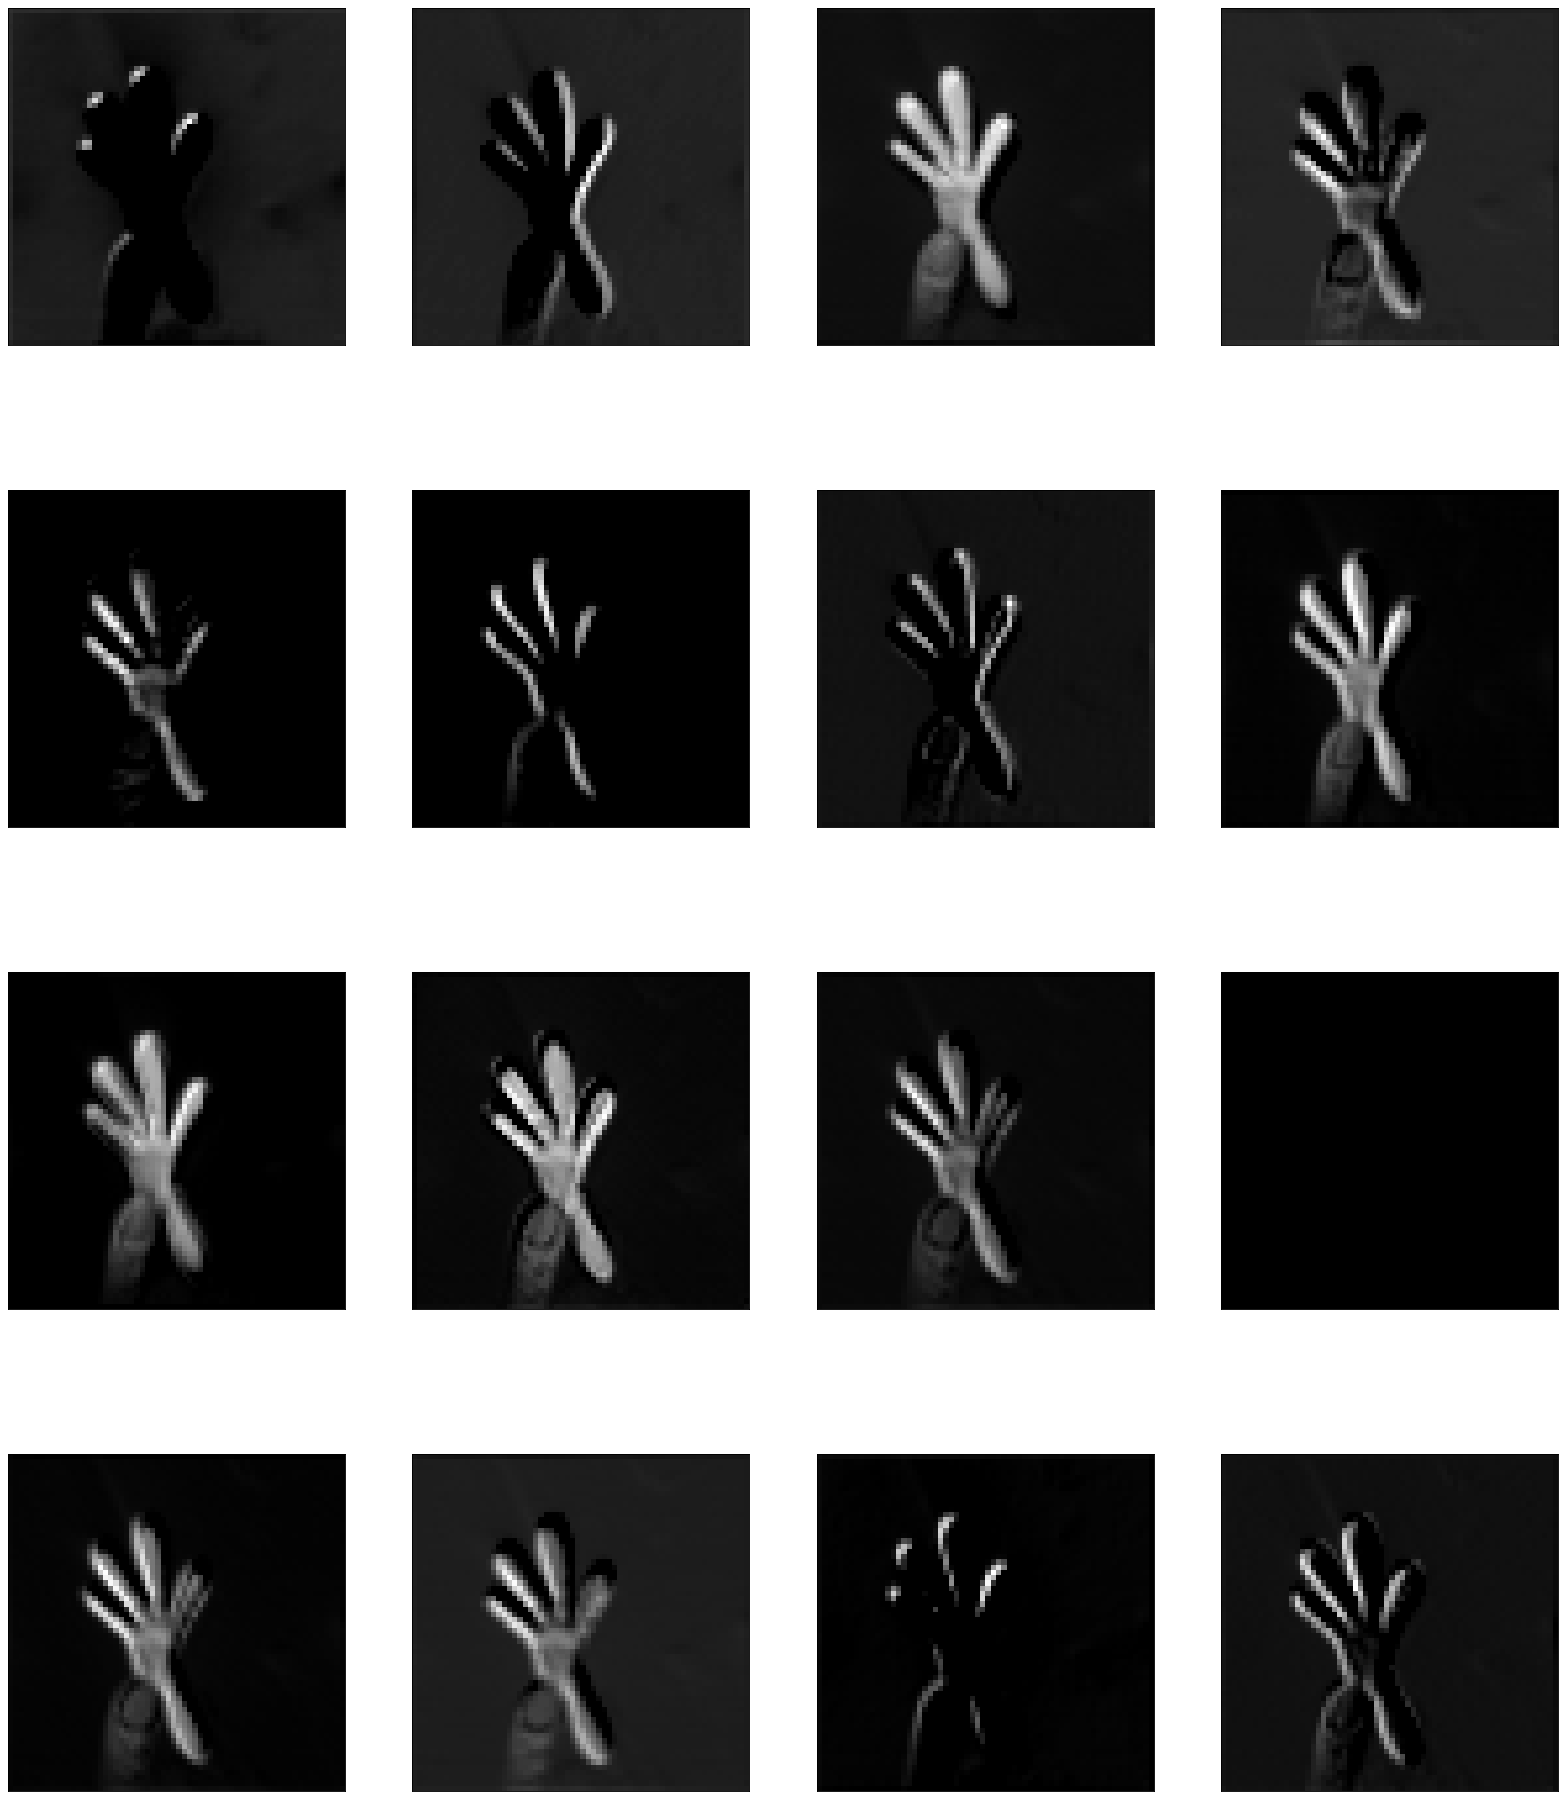

In [86]:
image_transform(X[1566])
image_transform_gray(X[1566])

# Test The Results

In [87]:
y_pred = model.evaluate(X_test , y_test,verbose =1)

63/63 [==============================] - 4s 38ms/step - loss: 0.4044 - accuracy: 0.9075 - precision: 0.3311 - recall: 0.9990


In [88]:
y_pred[1]

0.9075000286102295

In [90]:
model.predict(X_test)

63/63 [==============================] - 4s 34ms/step


array([[6.45310571e-03, 3.84405017e-01, 4.87816185e-02, ...,
        3.83523176e-03, 9.99999285e-01, 2.69799493e-02],
       [4.89320420e-02, 9.91881788e-01, 5.24467707e-01, ...,
        2.94676647e-02, 2.83734407e-02, 5.88708892e-02],
       [2.48667523e-01, 1.12048844e-02, 2.56108344e-01, ...,
        5.97013510e-04, 1.96238328e-03, 1.00000000e+00],
       ...,
       [4.98524398e-01, 1.00000000e+00, 6.83795691e-01, ...,
        3.85177359e-02, 3.72969825e-03, 2.51776706e-02],
       [1.15261875e-01, 1.57981599e-03, 2.10757051e-02, ...,
        4.74535255e-03, 2.68153381e-03, 2.26009011e-01],
       [9.73543286e-01, 1.85957346e-02, 3.23147536e-03, ...,
        2.93291546e-03, 2.65894458e-03, 1.78833246e-01]], dtype=float32)

In [91]:
y_prediction = model.predict(X_test)
def binary_classify(y_pred):
    for inp in y_pred:
        maximum = 0
        index = 0
        for i in range(10):
            if(maximum != max(maximum,inp[i])):
                maximum = max(maximum,inp[i])
                index = i
            inp[i] = 0
        inp[index]=1
    return y_pred
y_prediction  = binary_classify(y_prediction)

63/63 [==============================] - 2s 32ms/step


In [92]:
def create_result(y):
    y_final = []
    for i in range(y.shape[0]):
        y_final.append(enc.inverse_transform(y[i].reshape(1,10))[0][0])
    return y_final 
def remove_none(y , y_pred):
    index = []
    for i in range(len(y)-1,0,-1):
        if y_pred[i] == None :
            del y[i]
            del y_pred[i]
        
    return y , y_pred
def label_encode(y , y_pred):
    le = preprocessing.LabelEncoder()
    le.fit(y_pred)
    print(le.classes_)
    y = le.transform(y)
    y_pred = le.transform(y_pred)
    return y , y_pred

y_class_result = create_result(y_prediction)
y_class_desired = create_result(y_test)

In [93]:
y_label_desired , y_label_result = label_encode(y_class_desired , y_class_result) 

['01_palm' '02_l' '03_fist' '04_fist_moved' '05_thumb' '06_index' '07_ok'
 '08_palm_moved' '09_c' '10_down']


In [94]:
from sklearn.metrics import classification_report
tn = []
for cat in enc.categories_[0].reshape(10,1):
    tn.append(cat[0])
target_names = tn
print(classification_report(y_label_desired, y_label_result, target_names=target_names))

               precision    recall  f1-score   support

      01_palm       0.63      1.00      0.77       189
         02_l       0.94      1.00      0.97       197
      03_fist       0.88      0.98      0.93       182
04_fist_moved       1.00      0.61      0.76       213
     05_thumb       0.98      1.00      0.99       211
     06_index       1.00      0.98      0.99       201
        07_ok       0.86      0.92      0.89       209
08_palm_moved       1.00      0.79      0.88       203
         09_c       1.00      0.86      0.92       219
      10_down       1.00      0.98      0.99       176

     accuracy                           0.91      2000
    macro avg       0.93      0.91      0.91      2000
 weighted avg       0.93      0.91      0.91      2000



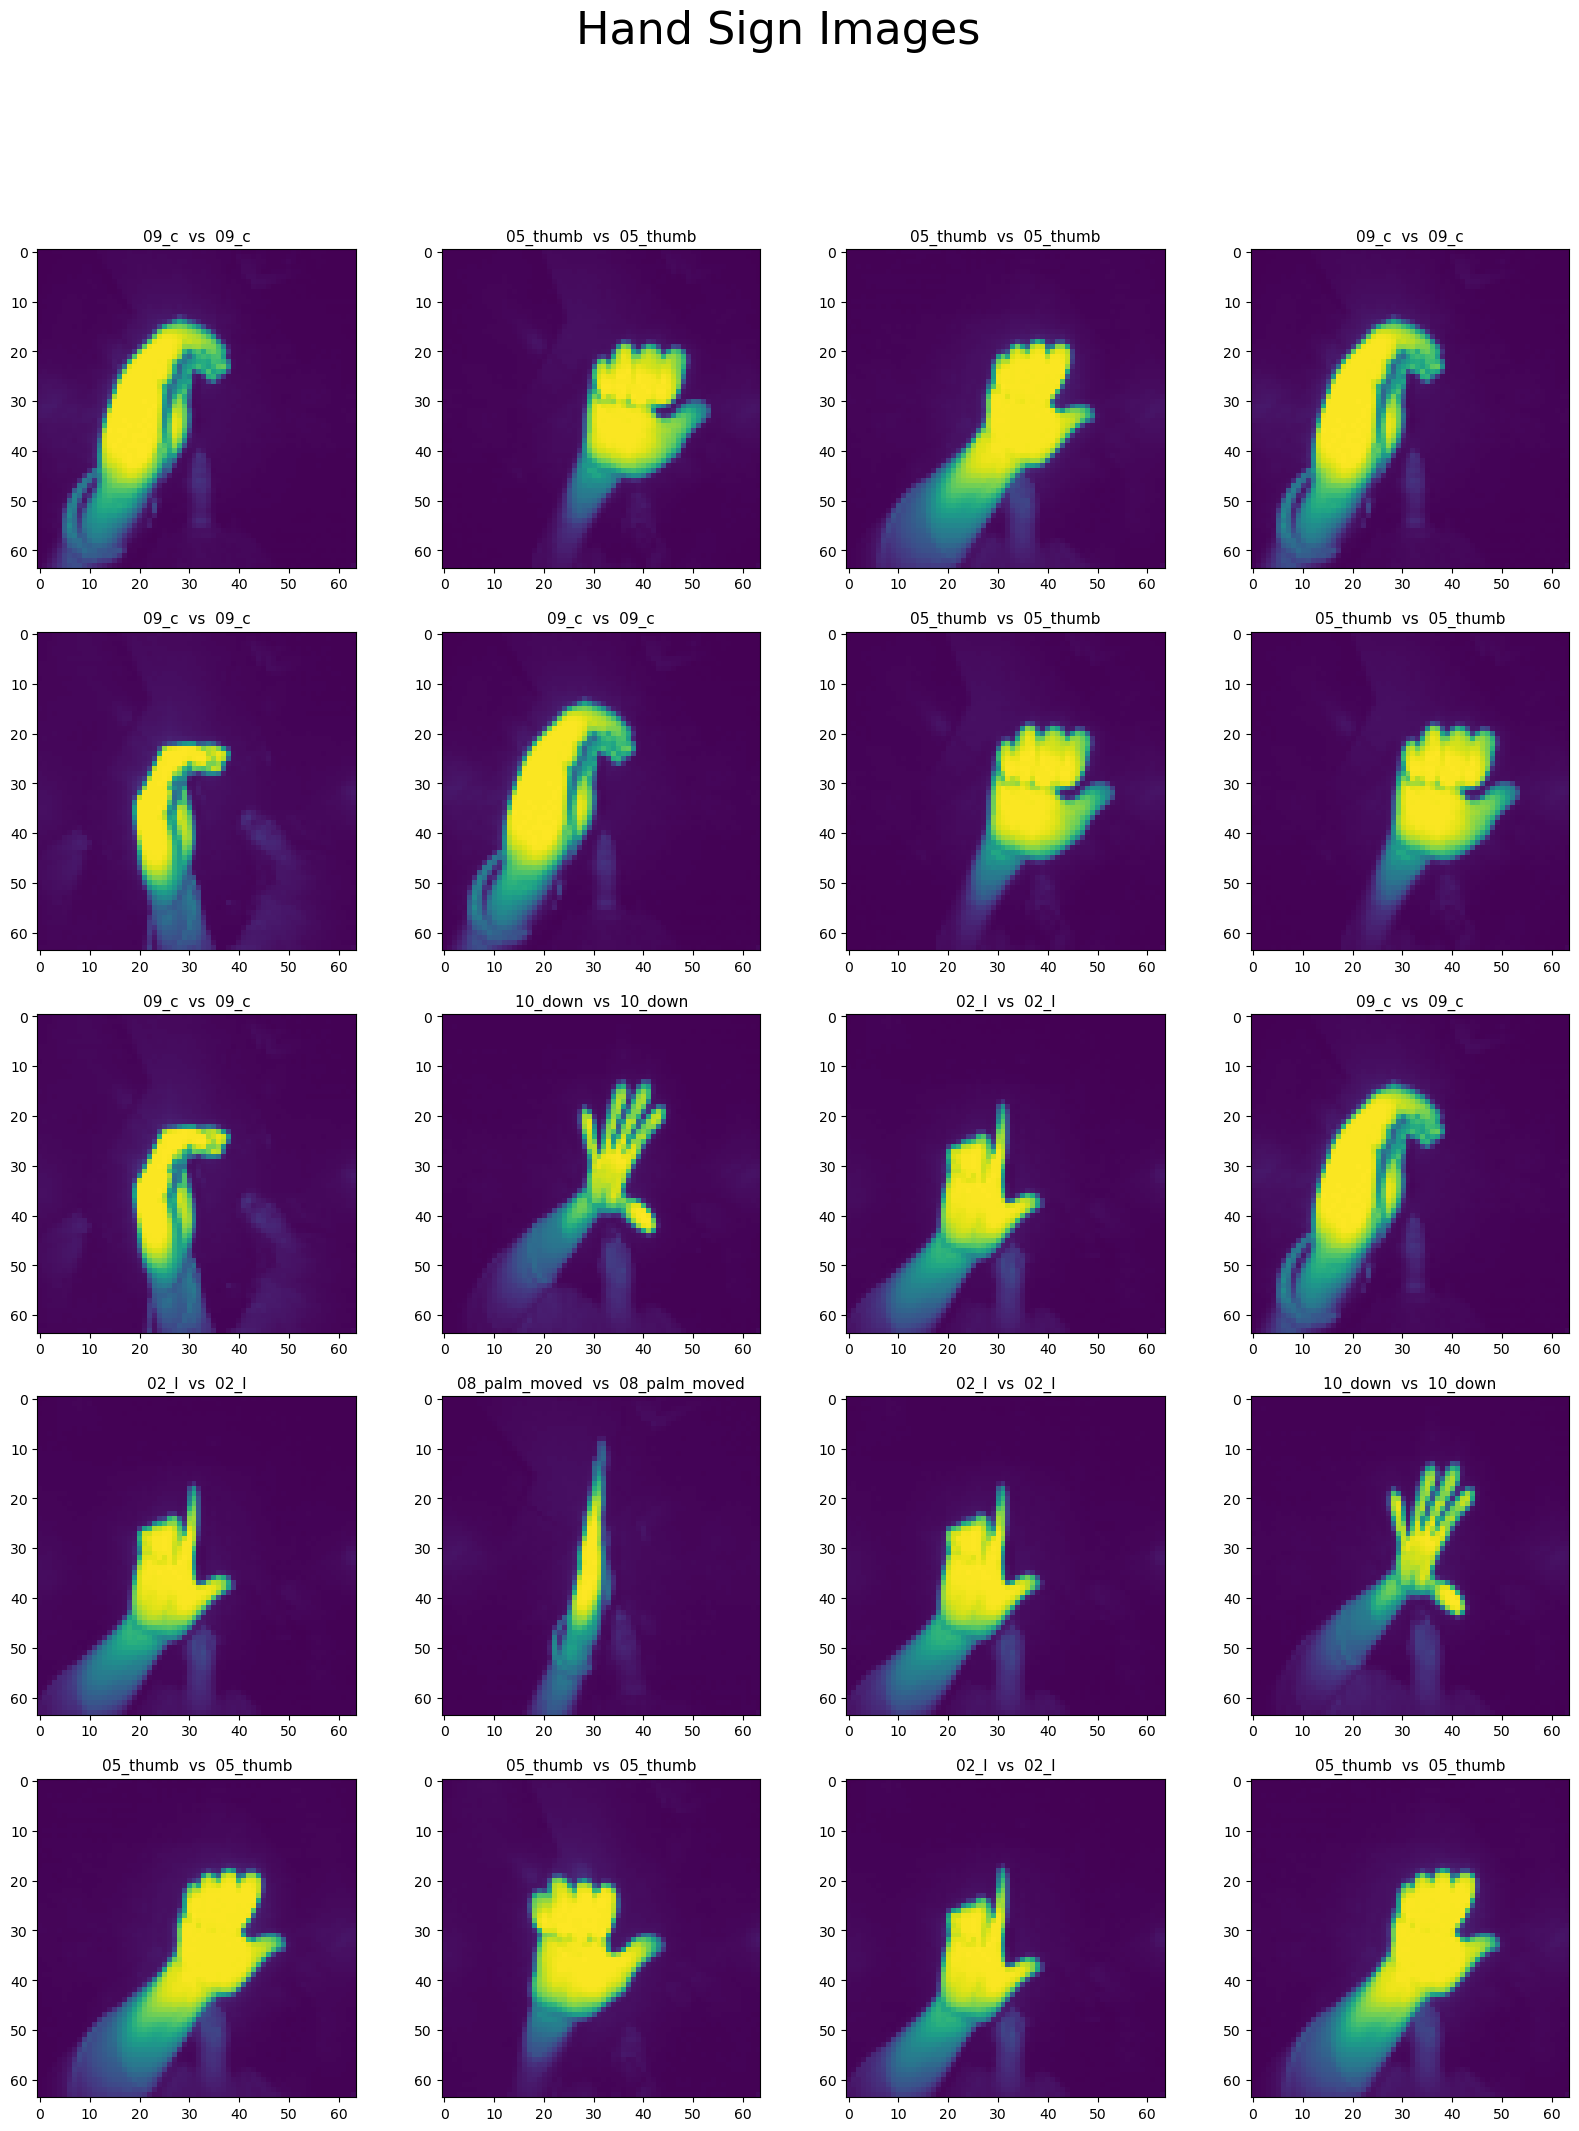

In [95]:
count = 1
f = plt.figure(figsize=(20,24))
for i in range(20):
    ind = random.sample(list(y_label_result),1)[0]
    img = X_test[ind]
    Class = str(y_class_desired[ind]) + '  vs  '+str(y_class_result[ind])
    ax = f.add_subplot(5, 4,count)
    ax = plt.imshow(img.reshape(w,h))
    ax = plt.title(Class,fontsize= 11)
    count = count + 1
plt.suptitle("Hand Sign Images", size = 32)
plt.show()